# 0. Pacotes

In [1]:
!pip install prettytable


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
%matplotlib inline
import plotly.express as px
from tabulate import tabulate
from prettytable import PrettyTable


C:\Users\jgjoa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
GoogleTrends = pd.read_csv(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\BaseGoogleTrends.csv", sep=',')

In [4]:
BaseANAC = pd.read_json(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\BaseANAC3.json")
BaseIPAC = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\ipca_202302SerieHist_mod.xls")
BaseDolar = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\USD_BRL Dados Históricos.xlsx")
BaseDesempRenda = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\tabela desemprego_tratada.xlsx")
BaseSalarioMinimo = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\Salario minimo ipea.xls")
BaseSelic = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\ipeadata_SelicCopom_mod.xlsx")
BaseTarifa = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\TarifasConsolidadas_mod.xlsx")
BaseDesempRenda2 =  pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\ConsolidadoRendaDesemprego.xlsx")

In [5]:
ICMS_Brasil = pd.read_csv(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\ipeadata icms brasil.csv", sep=';',decimal = ",")
ICMS_RJ = pd.read_csv(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\ipea icms RJ.csv", sep=';',decimal = ",")

## 1.BASE ANAC

Detalhamento: https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/dados-estatisticos-do-transporte-aereo/48-dados-estatisticos-do-transporte-aereo

In [6]:
BaseANACgov = pd.read_excel(r"C:\Users\jgjoa\Desktop\FGV\Dissertação\BaseANACgov2.xlsx")


In [7]:
BaseANACgov = BaseANACgov[BaseANACgov['PASSAGEIROS_PAGOS']>0]
BaseANACgov

EMPRESA_SIGLA              EMPRESA_NOME EMPRESA_NACIONALIDADE   ANO  \
0                AAL   AMERICAN AIRLINES, INC.           ESTRANGEIRA  2000   
1                AAL   AMERICAN AIRLINES, INC.           ESTRANGEIRA  2000   
2                AAL   AMERICAN AIRLINES, INC.           ESTRANGEIRA  2000   
3                AAL   AMERICAN AIRLINES, INC.           ESTRANGEIRA  2000   
4                AAL   AMERICAN AIRLINES, INC.           ESTRANGEIRA  2000   
...              ...                       ...                   ...   ...   
966121           UAL      UNITED AIRLINES, INC           ESTRANGEIRA  2023   
966162           VVC  VIVA AIR - FAST COLOMBIA           ESTRANGEIRA  2023   
966163           VVC  VIVA AIR - FAST COLOMBIA           ESTRANGEIRA  2023   
966164           VVC  VIVA AIR - FAST COLOMBIA           ESTRANGEIRA  2023   
966165           VVC  VIVA AIR - FAST COLOMBIA           ESTRANGEIRA  2023   

        MES    Mes-Ano AEROPORTO_DE_ORIGEM_SIGLA    AEROPORTO_DE_ORIGEM_NOME  \
0         1 2000-01-01                      KDFW  DALLAS & FORT WORTH, TEXAS   
1         1 2000-01-01                      KJFK          NEW YORK, NEW YORK   
2         1 2000-01-01                      KJFK          NEW YORK, NEW YORK   
3         1 2000-01-01                      KMIA              MIAMI, FLORIDA   
4         1 2000-01-01                      KMIA              MIAMI, FLORIDA   
...     ...        ...                       ...                         ...   
966121    3 2023-03-01                      SBGR                   GUARULHOS   
966162    1 2023-01-01                      SBGR                   GUARULHOS   
966163    1 2023-01-01                      SKRG           MEDELLÍN/RIONEGRO   
966164    2 2023-02-01                      SBGR                   GUARULHOS   
966165    2 2023-02-01                      SKRG           MEDELLÍN/RIONEGRO   

       AEROPORTO_DE_ORIGEM_UF AEROPORTO_DE_ORIGEM_REGIAO  ...  \
0                         NaN                        NaN  ...   
1                         NaN                        NaN  ...   
2                         NaN                        NaN  ...   
3                         NaN                        NaN  ...   
4                         NaN                        NaN  ...   
...                       ...                        ...  ...   
966121                     SP                    SUDESTE  ...   
966162                     SP                    SUDESTE  ...   
966163                    NaN                        NaN  ...   
966164                     SP                    SUDESTE  ...   
966165                    NaN                        NaN  ...   

       AEROPORTO_DE_DESTINO_NOME AEROPORTO_DE_DESTINO_UF  \
0                      GUARULHOS                      SP   
1                 RIO DE JANEIRO                      RJ   
2                      GUARULHOS                      SP   
3                        CONFINS                      MG   
4                 RIO DE JANEIRO                      RJ   
...                          ...                     ...   
966121         CHICAGO, ILLINOIS                     NaN   
966162         MEDELLÍN/RIONEGRO                     NaN   
966163                 GUARULHOS                      SP   
966164         MEDELLÍN/RIONEGRO                     NaN   
966165                 GUARULHOS                      SP   

       AEROPORTO_DE_DESTINO_REGIAO  AEROPORTO_DE_DESTINO_PAIS  \
0                          SUDESTE                     BRASIL   
1                          SUDESTE                     BRASIL   
2                          SUDESTE                     BRASIL   
3                          SUDESTE                     BRASIL   
4                          SUDESTE                     BRASIL   
...                            ...                        ...   
966121                         NaN  ESTADOS UNIDOS DA AMÉRICA   
966162                         NaN                   COLÔMBIA   
966163                

In [8]:
BaseANACgov.describe()

ANO            MES  PASSAGEIROS_PAGOS  PASSAGEIROS_GRATIS  \
count  682726.000000  682726.000000      682726.000000       682726.000000   
mean     2010.314065       6.427214        2677.037071           57.582871   
std         6.495306       3.527236        5098.240645          175.376925   
min      2000.000000       1.000000           1.000000            0.000000   
25%      2005.000000       3.000000         118.000000            0.000000   
50%      2010.000000       6.000000         651.000000            5.000000   
75%      2016.000000      10.000000        3107.000000           44.000000   
max      2023.000000      12.000000       92357.000000         7452.000000   

            ASSENTOS  
count  525982.000000  
mean     5156.534011  
std      8133.736180  
min         0.000000  
25%       435.000000  
50%      2628.000000  
75%      6656.000000  
max    154845.000000

In [9]:
BaseANACgov2= BaseANACgov.groupby(["Mes-Ano","ANO","MES"], as_index=False)['PASSAGEIROS_PAGOS'].sum()
BaseANACgov2


Mes-Ano   ANO  MES  PASSAGEIROS_PAGOS
0   2000-01-01  2000    1          3351571.0
1   2000-02-01  2000    2          2919936.0
2   2000-03-01  2000    3          3170764.0
3   2000-04-01  2000    4          3106148.0
4   2000-05-01  2000    5          2965231.0
..         ...   ...  ...                ...
274 2022-11-01  2022   11          8860265.0
275 2022-12-01  2022   12          9339419.0
276 2023-01-01  2023    1         10180464.0
277 2023-02-01  2023    2          8157666.0
278 2023-03-01  2023    3          9078497.0

[279 rows x 4 columns]

In [10]:
BaseANACgov2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mes-Ano            279 non-null    datetime64[ns]
 1   ANO                279 non-null    int64         
 2   MES                279 non-null    int64         
 3   PASSAGEIROS_PAGOS  279 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 8.8 KB


In [11]:
BaseANACgov2.describe()

ANO         MES  PASSAGEIROS_PAGOS
count   279.000000  279.000000       2.790000e+02
mean   2011.129032    6.451613       6.550834e+06
std       6.724634    3.471931       2.753477e+06
min    2000.000000    1.000000       4.387100e+05
25%    2005.000000    3.000000       3.814396e+06
50%    2011.000000    6.000000       6.474500e+06
75%    2017.000000    9.000000       9.087566e+06
max    2023.000000   12.000000       1.157676e+07

In [12]:
fig = px.bar(BaseANACgov2[["ANO","PASSAGEIROS_PAGOS"]], x="ANO", y="PASSAGEIROS_PAGOS", title="")
fig.show()

In [13]:
fig = px.line(BaseANACgov2[["Mes-Ano","PASSAGEIROS_PAGOS"]], x="Mes-Ano", y="PASSAGEIROS_PAGOS", title="")
fig.show()

<AxesSubplot:>

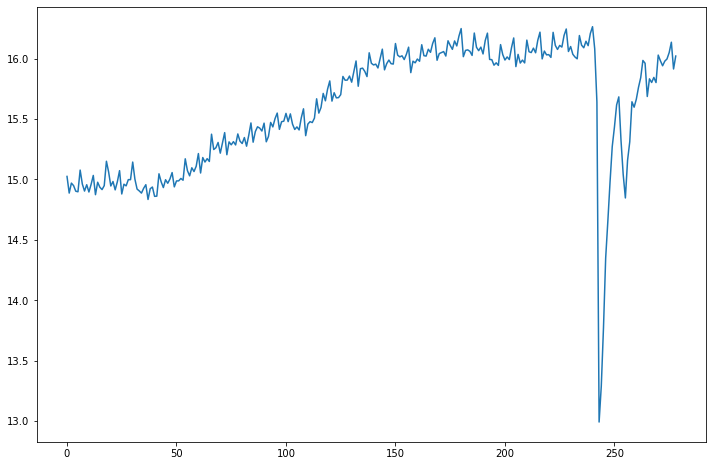

In [14]:
BaseANACgov_log = np.log(BaseANACgov2['PASSAGEIROS_PAGOS'])
BaseANACgov_log.plot(figsize=(12,8))

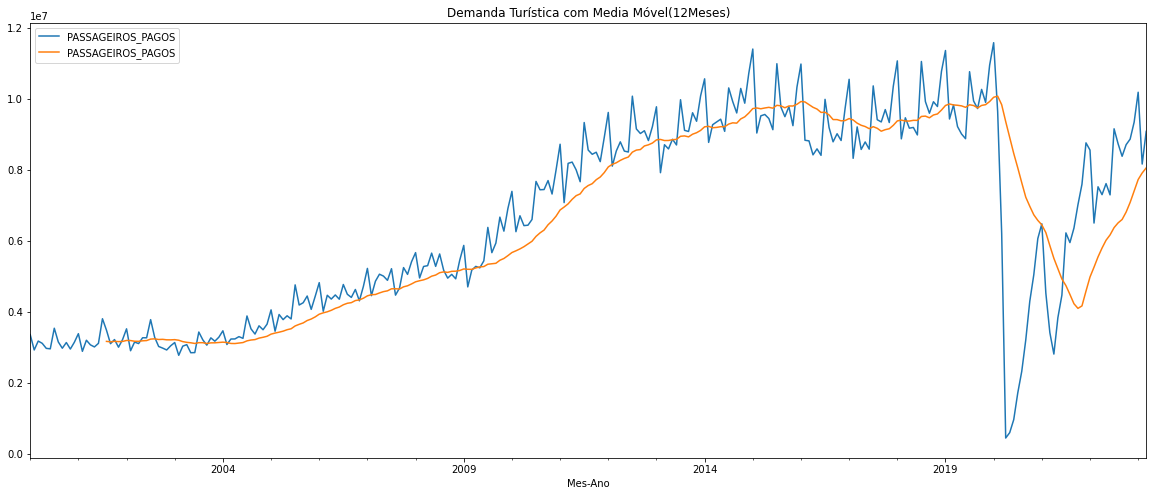

In [15]:
moving_avg = BaseANACgov2[["Mes-Ano", "PASSAGEIROS_PAGOS"]].set_index("Mes-Ano").rolling(window=20, center=False).mean()

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Demanda Turística com Media Móvel(12Meses)')

original_data = BaseANACgov2[["Mes-Ano", "PASSAGEIROS_PAGOS"]].set_index("Mes-Ano")
original_data_plot = original_data.plot(ax=ax, label="Original Data")
moving_avg_plot = moving_avg.plot(ax=ax, label="Moving Average")

plt.legend(loc="upper left")
plt.show()

In [16]:
fig = px.bar(BaseANACgov2[["MES","PASSAGEIROS_PAGOS"]], x="MES", y="PASSAGEIROS_PAGOS", title="")
fig.show()

In [17]:
BaseANACgov.groupby(["EMPRESA_NOME"], as_index=False)['PASSAGEIROS_PAGOS'].sum().sort_values('PASSAGEIROS_PAGOS', ascending=False).head(10)

EMPRESA_NOME  PASSAGEIROS_PAGOS
176                             TAM LINHAS AÉREAS S.A.        589039402.0
98   GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...        516013374.0
50                  AZUL LINHAS AÉREAS BRASILEIRAS S/A        240152156.0
197                 VARIG - VIAÇÃO AÉREA RIO-GRANDENSE         72667422.0
137              OCEANAIR LINHAS AÉREAS S.A. (AVIANCA)         72177758.0
179           TAP - TRANSPORTES AÉREOS PORTUGUESES S/A         25942399.0
34                             AMERICAN AIRLINES, INC.         24481551.0
189  TRIP SERVIÇOS DE SUPORTE AÉREO S.A (EX. TRIP L...         22273370.0
202       WEBJET PARTICIPAÇÕES S.A. (EX-LINHAS AÉREAS)         18048146.0
198                             VIAÇÃO AÉREA SÃO PAULO         16836356.0

In [18]:
BaseANACgov.groupby(["AEROPORTO_DE_ORIGEM_NOME"], as_index=False)['PASSAGEIROS_PAGOS'].sum().sort_values('PASSAGEIROS_PAGOS', ascending=False).head(10)

AEROPORTO_DE_ORIGEM_NOME  PASSAGEIROS_PAGOS
224                GUARULHOS        288685959.0
459           RIO DE JANEIRO        200404316.0
531                SÃO PAULO        177802323.0
84                  BRASÍLIA        139868106.0
152                  CONFINS         72333235.0
476                 SALVADOR         71294271.0
427             PORTO ALEGRE         63953216.0
110                 CAMPINAS         63447942.0
452                   RECIFE         62227570.0
526     SÃO JOSÉ DOS PINHAIS         54432249.0

In [19]:
BaseANACgov.groupby(["AEROPORTO_DE_DESTINO_NOME"], as_index=False)['PASSAGEIROS_PAGOS'].sum().sort_values('PASSAGEIROS_PAGOS', ascending=False).head(10)

AEROPORTO_DE_DESTINO_NOME  PASSAGEIROS_PAGOS
228                 GUARULHOS        289828840.0
464            RIO DE JANEIRO        200615042.0
543                 SÃO PAULO        176472460.0
84                   BRASÍLIA        140498753.0
157                   CONFINS         72565802.0
485                  SALVADOR         71171213.0
112                  CAMPINAS         64038580.0
433              PORTO ALEGRE         63783638.0
457                    RECIFE         62095082.0
537      SÃO JOSÉ DOS PINHAIS         54577299.0

In [20]:
BaseANACgov.groupby(["AEROPORTO_DE_ORIGEM_PAIS"], as_index=False)['PASSAGEIROS_PAGOS'].sum().sort_values('PASSAGEIROS_PAGOS', ascending=False).head(10)

AEROPORTO_DE_ORIGEM_PAIS  PASSAGEIROS_PAGOS
11                     BRASIL       1.654844e+09
29  ESTADOS UNIDOS DA AMÉRICA       3.796563e+07
2                   ARGENTINA       2.947224e+07
69                   PORTUGAL       1.425545e+07
17                      CHILE       1.114921e+07
31                     FRANÇA       9.124047e+06
28                    ESPANHA       8.282194e+06
0                    ALEMANHA       7.175340e+06
63                     PANAMÁ       5.773059e+06
89                    URUGUAI       5.382372e+06

In [21]:
BaseANACgov.groupby(["AEROPORTO_DE_DESTINO_PAIS"], as_index=False)['PASSAGEIROS_PAGOS'].sum().sort_values('PASSAGEIROS_PAGOS', ascending=False).head(10)

AEROPORTO_DE_DESTINO_PAIS  PASSAGEIROS_PAGOS
11                     BRASIL       1.653064e+09
31  ESTADOS UNIDOS DA AMÉRICA       3.749223e+07
3                   ARGENTINA       2.965553e+07
70                   PORTUGAL       1.459285e+07
17                      CHILE       1.125862e+07
33                     FRANÇA       9.531824e+06
30                    ESPANHA       8.620226e+06
0                    ALEMANHA       7.312784e+06
64                     PANAMÁ       5.963731e+06
88                    URUGUAI       5.285489e+06

## 2. BASE DOLAR

In [31]:
BaseDolar

Data  Último  Abertura  Máxima  Mínima  Vol.    Var%
0   2023-05-01  4.9531    4.9875  5.0529  4.9250   NaN -0.0067
1   2023-04-01  4.9865    5.0637  5.1002  4.8921   NaN -0.0151
2   2023-03-01  5.0631    5.2369  5.3421  5.0547   NaN -0.0332
3   2023-02-01  5.2367    5.0736  5.3092  4.9401   NaN  0.0322
4   2023-01-01  5.0731    5.2865  5.4802  5.0560   NaN -0.0403
..         ...     ...       ...     ...     ...   ...     ...
276 2000-05-01  1.8240    1.7990  1.8600  1.7960   NaN  0.0105
277 2000-04-01  1.8050    1.7360  1.8170  1.7360   NaN  0.0377
278 2000-03-01  1.7395    1.7675  1.7695  1.7085   NaN -0.0161
279 2000-02-01  1.7680    1.7840  1.7990  1.7560   NaN -0.0090
280 2000-01-01  1.7840    1.8010  1.8700  1.7610   NaN -0.0119

[281 rows x 7 columns]

In [32]:
BaseDolar['Data'] = pd.to_datetime(BaseDolar['Data'])
#BaseDolar['Mes.Ano'] = BaseDolar['Data'].dt.strftime('%m-%Y').astype(str)


BaseDolar['Mes.Ano'] = BaseDolar['Data'].dt.month.astype(str) + '-' +BaseDolar['Data'].dt.year.astype(str)

In [33]:
#BaseDolar.set_index('Mes.Ano', inplace = True)
BaseDolar


Data  Último  Abertura  Máxima  Mínima  Vol.    Var% Mes.Ano
0   2023-05-01  4.9531    4.9875  5.0529  4.9250   NaN -0.0067  5-2023
1   2023-04-01  4.9865    5.0637  5.1002  4.8921   NaN -0.0151  4-2023
2   2023-03-01  5.0631    5.2369  5.3421  5.0547   NaN -0.0332  3-2023
3   2023-02-01  5.2367    5.0736  5.3092  4.9401   NaN  0.0322  2-2023
4   2023-01-01  5.0731    5.2865  5.4802  5.0560   NaN -0.0403  1-2023
..         ...     ...       ...     ...     ...   ...     ...     ...
276 2000-05-01  1.8240    1.7990  1.8600  1.7960   NaN  0.0105  5-2000
277 2000-04-01  1.8050    1.7360  1.8170  1.7360   NaN  0.0377  4-2000
278 2000-03-01  1.7395    1.7675  1.7695  1.7085   NaN -0.0161  3-2000
279 2000-02-01  1.7680    1.7840  1.7990  1.7560   NaN -0.0090  2-2000
280 2000-01-01  1.7840    1.8010  1.8700  1.7610   NaN -0.0119  1-2000

[281 rows x 8 columns]

In [34]:
BaseDolar.dtypes

Data        datetime64[ns]
Último             float64
Abertura           float64
Máxima             float64
Mínima             float64
Vol.               float64
Var%               float64
Mes.Ano             object
dtype: object

## 3. BASE IPCA

In [35]:
BaseIPAC["Mes.Ano"] = BaseIPAC['MÊS'].astype(str) + "-" + BaseIPAC['ANO'].astype(str) 
BaseIPAC


Mes-Ano   ANO  MÊS  NÚMERO ÍNDICE  Mes.Ano
0   1994-01-01  1994    1         141.31   1-1994
1   1994-02-01  1994    2         198.22   2-1994
2   1994-03-01  1994    3         282.96   3-1994
3   1994-04-01  1994    4         403.73   4-1994
4   1994-05-01  1994    5         581.49   5-1994
..         ...   ...  ...            ...      ...
346 2022-11-01  2022   11        6434.20  11-2022
347 2022-12-01  2022   12        6474.09  12-2022
348 2023-01-01  2023    1        6508.40   1-2023
349 2023-02-01  2023    2        6563.07   2-2023
350 2023-03-01  2023    3        6609.67   3-2023

[351 rows x 5 columns]

In [36]:
BaseIPAC.dtypes

Mes-Ano          datetime64[ns]
ANO                       int64
MÊS                       int64
NÚMERO ÍNDICE           float64
Mes.Ano                  object
dtype: object

## 4. BASE DESEMPREGO E RENDA

In [37]:
BaseDesempRenda = BaseDesempRenda[['Data','DataFormat','População total',
                                    'Taxa de participação na força de trabalho das pessoas de 14 anos ou mais de idade, na semana de referência',
                                  'Rendimento médio de todos os trabalhos, efetivamente recebido no mês de referência, pelas pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho'
                                  ]]


In [38]:
BaseDesempRenda = BaseDesempRenda.rename(columns={'DataFormat':'DataFormat','Taxa de participação na força de trabalho das pessoas de 14 anos ou mais de idade, na semana de referência': 'Taxa de Ocupação',  'Rendimento médio de todos os trabalhos, efetivamente recebido no mês de referência, pelas pessoas de 14 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho': 'Renda Média'})


BaseDesempRenda['Mes.Ano'] = BaseDesempRenda['DataFormat'].dt.year.astype(str) + '-' + BaseDesempRenda['DataFormat'].dt.month.astype(str) + '-01' 

In [39]:
BaseDesempRenda

Data DataFormat  População total  Taxa de Ocupação  Renda Média  \
0    2012-1-1 2012-01-01           196931              60.8         1506   
1    2012-2-1 2012-02-01           197074              61.2         1401   
2    2012-3-1 2012-03-01           197217              61.4         1472   
3    2012-4-1 2012-04-01           197359              61.9         1272   
4    2012-5-1 2012-05-01           197502              61.7         1399   
..        ...        ...              ...               ...          ...   
110  2021-3-1 2021-03-01           212169              56.8         2545   
111  2021-4-1 2021-04-01           212297              57.0         2322   
112  2021-5-1 2021-05-01           212426              58.0         2483   
113  2021-6-1 2021-06-01           212553              58.2         2501   
114  2021-7-1 2021-07-01           212681              58.3         2314   

       Mes.Ano  
0    2012-1-01  
1    2012-2-01  
2    2012-3-01  
3    2012-4-01  
4    2012-5-01  
..         ...  
110  2021-3-01  
111  2021-4-01  
112  2021-5-01  
113  2021-6-01  
114  2021-7-01  

[115 rows x 6 columns]

In [40]:
BaseDesempRenda2 = BaseDesempRenda2.rename(columns={'Taxa de desocupação - (%) - Instituto Brasileiro de Geografia e Estatística- Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_TDESOC12':'Taxa de Desocupação(%)',
                                                    'Rendimento médio de todos os trabalhos efetivos mensais - R$ - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RTE12 - ':'Rend med trabalhos',
                                                    'Rendimento real médio do trabalho principal habitual mensal - R$ Penúltimo mês da série - Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua) - PNADC12_RRPH12 - ':'Rend med trabalho princial'})

In [41]:
BaseDesempRenda2

Data    Data2  Taxa de Desocupação(%)  Rend med trabalhos  \
0   2012-03-01  2012.03                     8.0              1500.0   
1   2012-04-01  2012.04                     7.8              1420.0   
2   2012-05-01  2012.05                     7.7              1424.0   
3   2012-06-01  2012.06                     7.6              1433.0   
4   2012-07-01  2012.07                     7.5              1445.0   
..         ...      ...                     ...                 ...   
131 2023-02-01  2023.02                     8.6                 NaN   
132 2023-03-01  2023.03                     8.8                 NaN   
133 2023-04-01  2023.04                     8.5                 NaN   
134 2023-05-01  2023.05                     8.3                 NaN   
135 2023-06-01  2023.06                     8.0                 NaN   

     Rend med trabalho princial  
0                          2673  
1                          2685  
2                          2678  
3                          2684  
4                          2697  
..                          ...  
131                        2833  
132                        2841  
133                        2828  
134                        2825  
135                        2836  

[136 rows x 5 columns]

## 5. Base Selic

In [45]:
BaseSelic.head()


Data  Mes   Ano  \
0 1996-07-01    7  1996   
1 1996-08-01    8  1996   
2 1996-09-01    9  1996   
3 1996-10-01   10  1996   
4 1996-11-01   11  1996   

   Taxa de juros - Selic - fixada pelo Copom - (% a.a.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM366_TJOVER366  
0                                           253401.0                                                                                                                            
1                                           253401.0                                                                                                                            
2                                           250453.0                                                                                                                            
3                                           241644.0                                                                                                                            
4                                           235803.0

In [46]:
BaseSelic.dtypes

Data                                                                                                                                                                           datetime64[ns]
Mes                                                                                                                                                                                     int64
Ano                                                                                                                                                                                     int64
Taxa de juros - Selic - fixada pelo Copom - (% a.a.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM366_TJOVER366           float64
dtype: object

In [47]:
BaseSelic.rename(columns={'Taxa de juros - Selic - fixada pelo Copom - (% a.a.) - Banco Central do Brasil- Boletim- Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - BM366_TJOVER366': "Taxa de Juros - Selic"},inplace = True)

BaseSelic['Mes.Ano'] = BaseSelic['Data'].dt.month.astype(str) + '-' + BaseSelic['Data'].dt.year.astype(str)
BaseSelic.head()


Data  Mes   Ano  Taxa de Juros - Selic  Mes.Ano
0 1996-07-01    7  1996               253401.0   7-1996
1 1996-08-01    8  1996               253401.0   8-1996
2 1996-09-01    9  1996               250453.0   9-1996
3 1996-10-01   10  1996               241644.0  10-1996
4 1996-11-01   11  1996               235803.0  11-1996

## 6. Base Tarifas

Detalhamento: https://www.anac.gov.br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/tarifas-aereas-domesticas/46-tarifas-aereas-domesticas

In [48]:
BaseTarifa['ANO'] = BaseTarifa['ANO'].astype(int)
BaseTarifa = BaseTarifa.round(2)
BaseTarifa

Data   ANO  MES   ASSENTOS  TARIFA
0   2002-01-01  2002    1  1312446.0  303.12
1   2002-02-01  2002    2  1150345.0  302.38
2   2002-03-01  2002    3  1226532.0  284.98
3   2002-04-01  2002    4  1158974.0  305.82
4   2002-05-01  2002    5  1139840.0  274.67
..         ...   ...  ...        ...     ...
250 2022-11-01  2022   11  2456623.0  940.08
251 2022-12-01  2022   12  1826543.0  952.67
252 2023-01-01  2023    1  2488754.0  895.37
253 2023-02-01  2023    2  2006356.0  877.88
254 2023-03-01  2023    3  2403804.0  918.62

[255 rows x 5 columns]

In [49]:
fig = px.line(BaseTarifa[["Data","TARIFA"]], x="Data", y="TARIFA", labels={'Data':'Mes-Ano', 'TARIFA':'Tarifa Média'}, title='Evolução Tarifa Média')

fig.show()

In [50]:
BaseTarifa[BaseTarifa['TARIFA'] == 'NaN']

Empty DataFrame
Columns: [Data, ANO, MES, ASSENTOS, TARIFA]
Index: []

# Base Consolidada

In [59]:
BaseANACgov2 = BaseANACgov2.set_index('Mes-Ano')
BaseANACgov2

ANO  MES  PASSAGEIROS_PAGOS
Mes-Ano                                 
2000-01-01  2000    1          3351571.0
2000-02-01  2000    2          2919936.0
2000-03-01  2000    3          3170764.0
2000-04-01  2000    4          3106148.0
2000-05-01  2000    5          2965231.0
...          ...  ...                ...
2022-11-01  2022   11          8860265.0
2022-12-01  2022   12          9339419.0
2023-01-01  2023    1         10180464.0
2023-02-01  2023    2          8157666.0
2023-03-01  2023    3          9078497.0

[279 rows x 3 columns]

In [61]:
BaseConsolidada2 = BaseANACgov2.join(BaseIPAC[['Mes-Ano','NÚMERO ÍNDICE']].set_index('Mes-Ano'))
BaseConsolidada2 = BaseConsolidada2.join(BaseDolar[['Data','Último']].set_index('Data'))
BaseConsolidada2 = BaseConsolidada2.join(BaseSelic[['Data','Taxa de Juros - Selic']].set_index('Data'))
BaseConsolidada2 = BaseConsolidada2.join(BaseTarifa[['Data','TARIFA']].set_index('Data'))
BaseConsolidada2 = BaseConsolidada2.join(BaseDesempRenda2[['Data','Taxa de Desocupação(%)','Rend med trabalho princial']].set_index('Data'))


In [62]:
BaseConsolidada2.rename(columns={'PASSAGEIROS_PAGOS':'TotalPassageiros','NÚMERO ÍNDICE':"Índice IPCA", "Último":"Dolar", "TARIFA":"Tarifa Média","Renda Média":"Renda Média","Taxa de Ocupação":"Taxa de Ocupação"}, inplace = True)
BaseConsolidada2 = BaseConsolidada2[BaseConsolidada2['ANO'] > 2012]
BaseConsolidada2

ANO  MES  TotalPassageiros  Índice IPCA   Dolar  \
Mes-Ano                                                        
2013-01-01  2013    1         9771200.0      3633.44  1.9902   
2013-02-01  2013    2         7913824.0      3655.24  1.9795   
2013-03-01  2013    3         8702291.0      3672.42  2.0235   
2013-04-01  2013    4         8583971.0      3692.62  2.0010   
2013-05-01  2013    5         8856742.0      3706.28  2.1418   
...          ...  ...               ...          ...     ...   
2022-11-01  2022   11         8860265.0      6434.20  5.1851   
2022-12-01  2022   12         9339419.0      6474.09  5.2860   
2023-01-01  2023    1        10180464.0      6508.40  5.0731   
2023-02-01  2023    2         8157666.0      6563.07  5.2367   
2023-03-01  2023    3         9078497.0      6609.67  5.0631   

            Taxa de Juros - Selic  Tarifa Média  Taxa de Desocupação(%)  \
Mes-Ano                                                                   
2013-01-01                   7.25        537.22                     7.3   
2013-02-01                   7.25        512.55                     7.8   
2013-03-01                   7.25        482.12                     8.1   
2013-04-01                   7.25        438.95                     7.9   
2013-05-01                   7.50        441.59                     7.7   
...                           ...           ...                     ...   
2022-11-01                  13.75        940.08                     8.1   
2022-12-01                  13.75        952.67                     7.9   
2023-01-01                  13.75        895.37                     8.4   
2023-02-01                  13.75        877.88                     8.6   
2023-03-01                  13.75        918.62                     8.8   

            Rend med trabalho princial  
Mes-Ano                                 
2013-01-01                      2699.0  
2013-02-01                      2716.0  
2013-03-01                      2736.0  
2013-04-01                      2742.0  
2013-05-01                      2744.0  
...                                ...  
2022-11-01                      2813.0  
2022-12-01                      2819.0  
2023-01-01                      2831.0  
2023-02-01                      2833.0  
2023-03-01                      2841.0  

[123 rows x 9 columns]

In [63]:
BaseConsolidada3 = BaseConsolidada2[BaseConsolidada2['ANO'] != 2020]


In [66]:
BaseConsolidada2.dtypes

ANO                             int64
MES                             int64
TotalPassageiros              float64
Índice IPCA                   float64
Dolar                         float64
Taxa de Juros - Selic         float64
Tarifa Média                  float64
Taxa de Desocupação(%)        float64
Rend med trabalho princial    float64
dtype: object

In [67]:
BaseConsolidada2.columns

Index(['ANO', 'MES', 'TotalPassageiros', 'Índice IPCA', 'Dolar',
       'Taxa de Juros - Selic', 'Tarifa Média', 'Taxa de Desocupação(%)',
       'Rend med trabalho princial'],
      dtype='object')

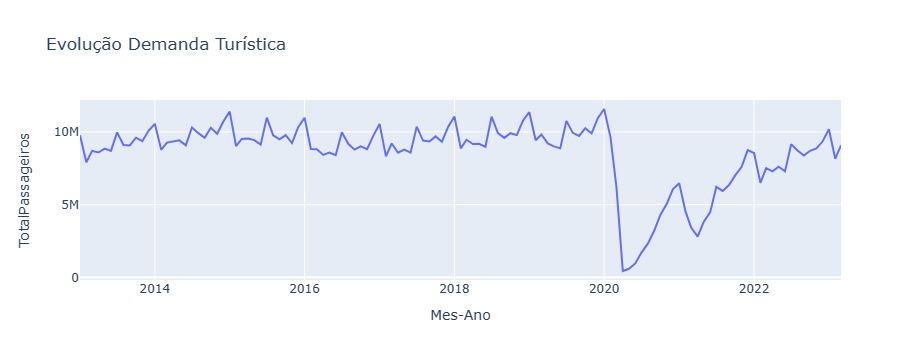

In [69]:
#BaseConsolidada['assentos_vendidos'].plot(figsize=(12,8))

fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="TotalPassageiros", title='Evolução Demanda Turística')
fig.show()


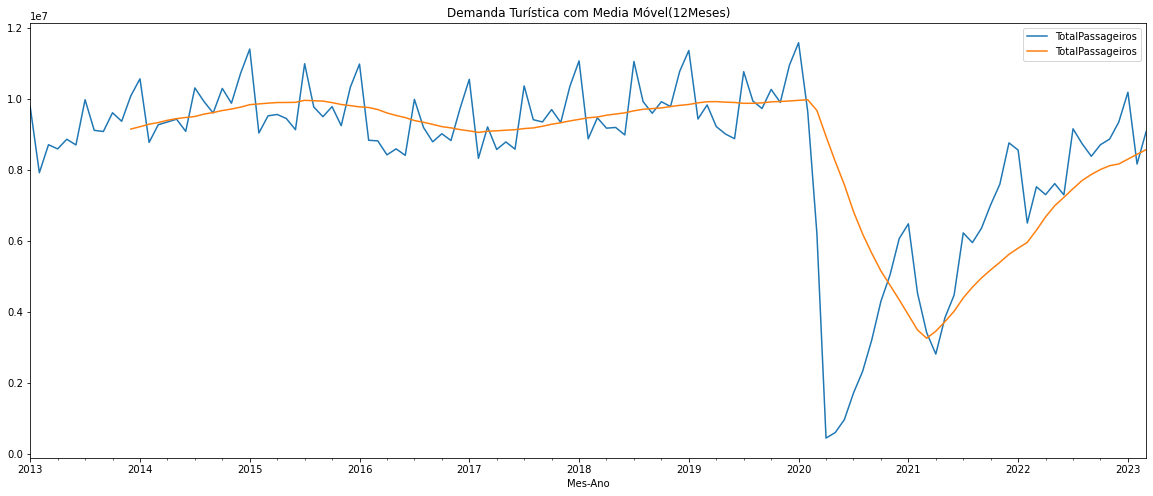

In [70]:
BaseConsolidada2 = BaseConsolidada2.reset_index()
moving_avg = BaseConsolidada2[["Mes-Ano","TotalPassageiros"]].set_index('Mes-Ano').rolling(window=12, center=False).mean()

fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Demanda Turística com Media Móvel(12Meses)')
BaseConsolidada2[["Mes-Ano","TotalPassageiros"]].set_index("Mes-Ano").plot(ax=ax, label = "Total de Passageiros")
moving_avg.plot(ax=ax, label = "Média Móvel")
ax.legend()
plt.show()

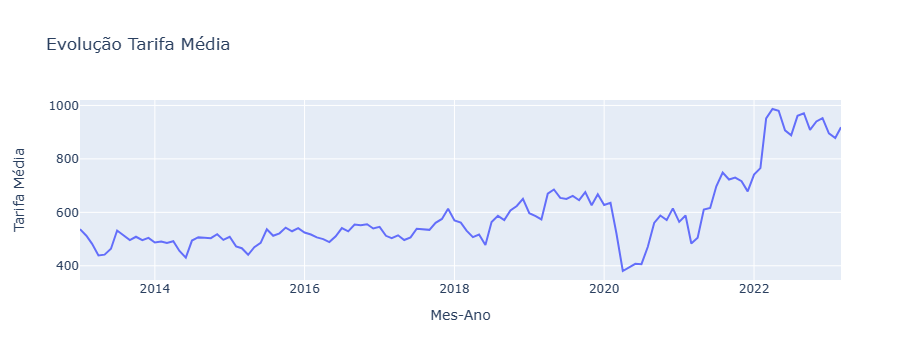

In [71]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Tarifa Média", title='Evolução Tarifa Média')

fig.show()


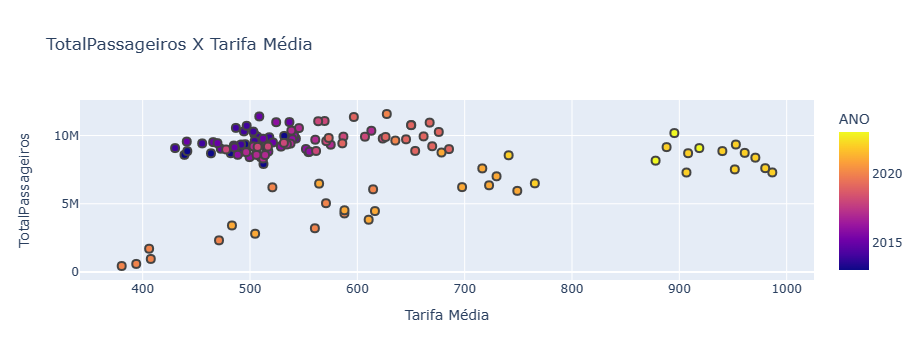

In [72]:
fig  = px.scatter(BaseConsolidada2, x = 'Tarifa Média', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X Tarifa Média')
fig.update_traces(marker = dict(size=8, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()


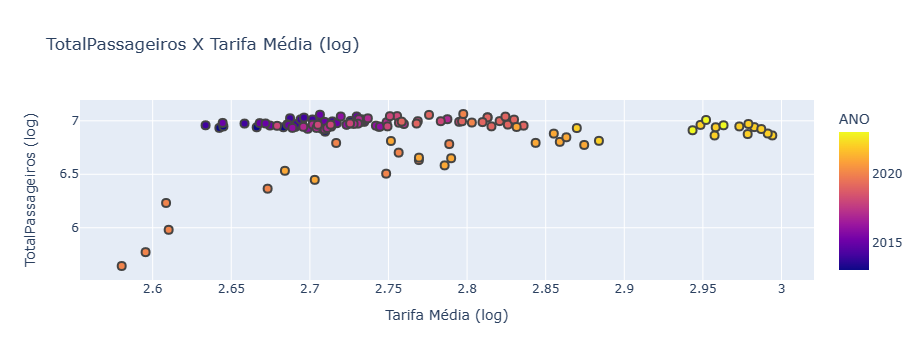

In [73]:
# Aplicando o logaritmo de base 10 às variáveis
BaseConsolidada2['Tarifa Média (log)'] = np.log10(BaseConsolidada2['Tarifa Média'])
BaseConsolidada2['TotalPassageiros (log)'] = np.log10(BaseConsolidada2['TotalPassageiros'])

fig = px.scatter(BaseConsolidada2, x='Tarifa Média (log)', y='TotalPassageiros (log)', color='ANO', title='TotalPassageiros X Tarifa Média (log)')
fig.update_traces(marker=dict(size=8, line=dict(width=2)))

fig.show()


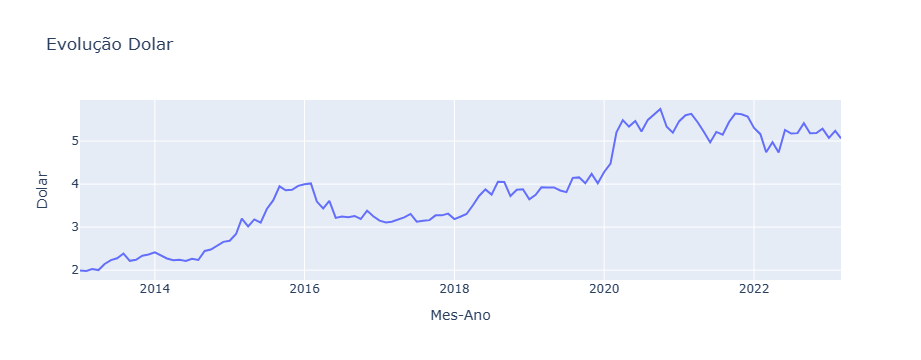

In [74]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Dolar", title='Evolução Dolar')

fig.show()


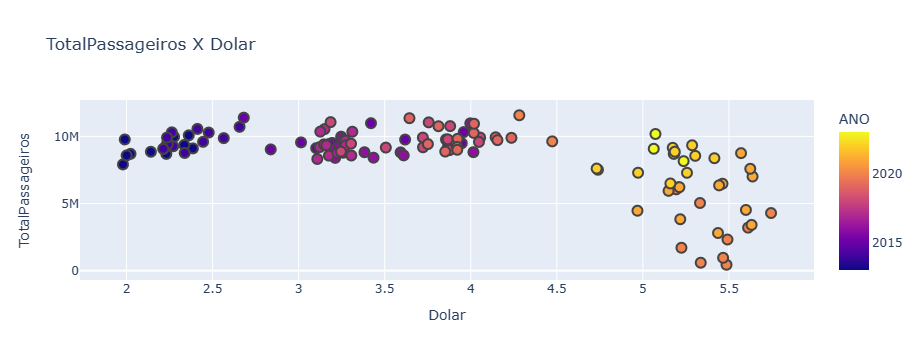

In [75]:
fig  = px.scatter(BaseConsolidada2, x = 'Dolar', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X Dolar')
fig.update_traces(marker = dict(size=10, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()


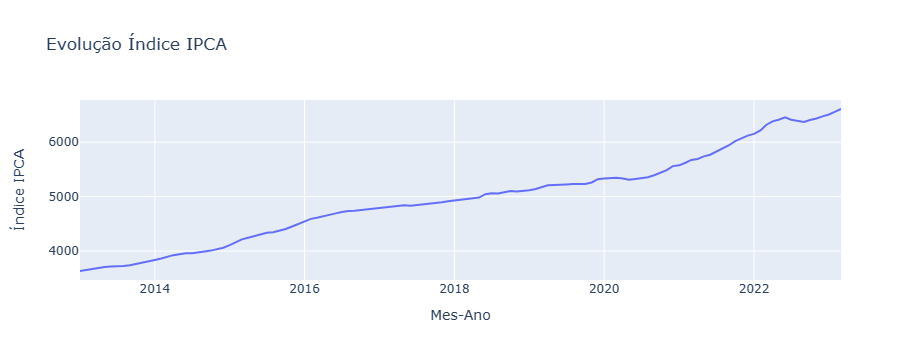

In [76]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Índice IPCA", title='Evolução Índice IPCA')

fig.show()


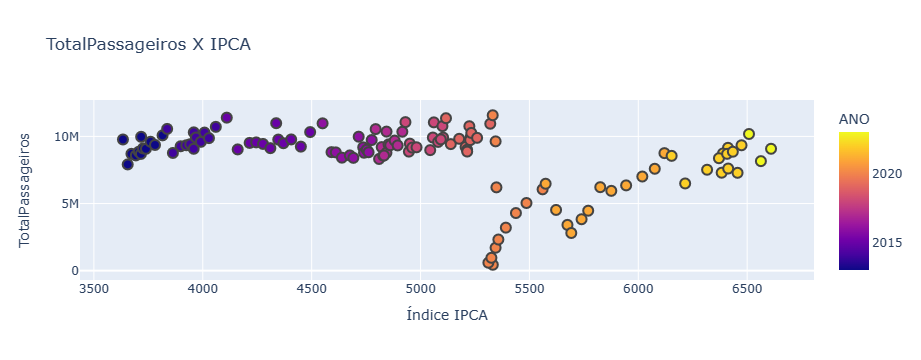

In [77]:
fig  = px.scatter(BaseConsolidada2, x = 'Índice IPCA', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X IPCA')
fig.update_traces(marker = dict(size=10, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()


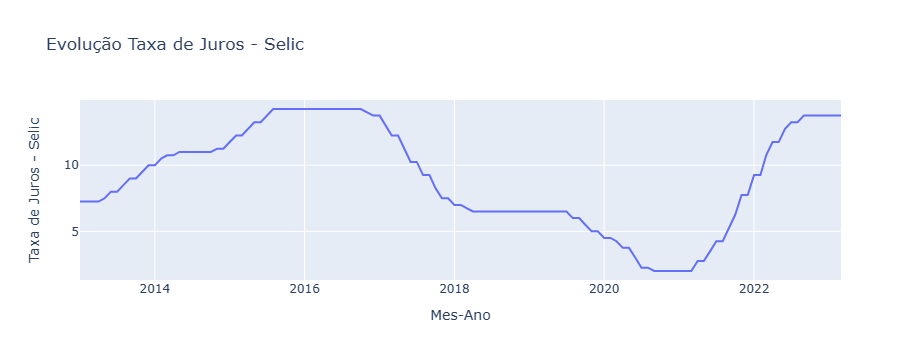

In [78]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Taxa de Juros - Selic", title='Evolução Taxa de Juros - Selic')

fig.show()


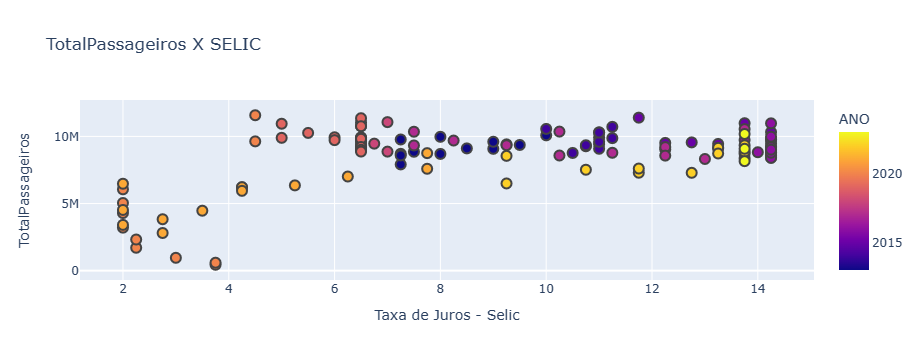

In [79]:
fig  = px.scatter(BaseConsolidada2, x = 'Taxa de Juros - Selic', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X SELIC')
fig.update_traces(marker = dict(size=10, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()

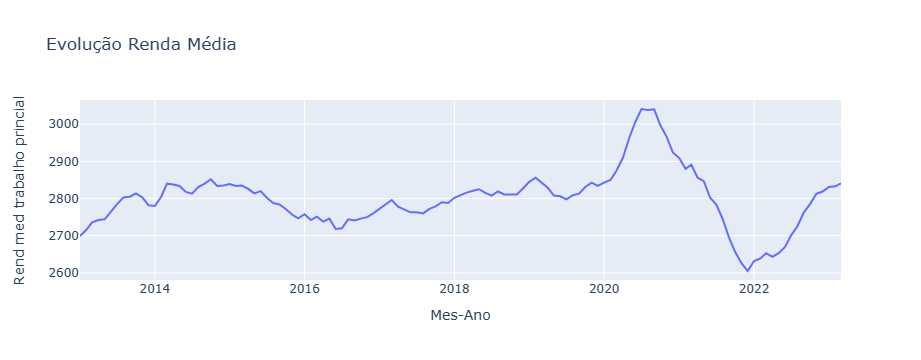

In [80]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Rend med trabalho princial", title='Evolução Renda Média')

fig.show()


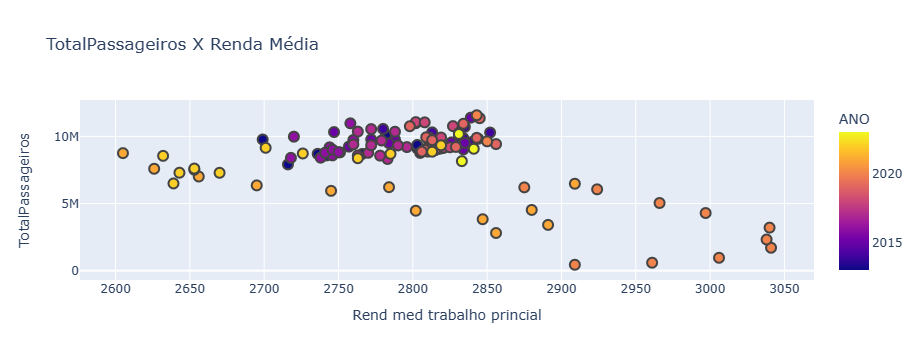

In [81]:
fig  = px.scatter(BaseConsolidada2, x = 'Rend med trabalho princial', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X Renda Média')
fig.update_traces(marker = dict(size=10, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()

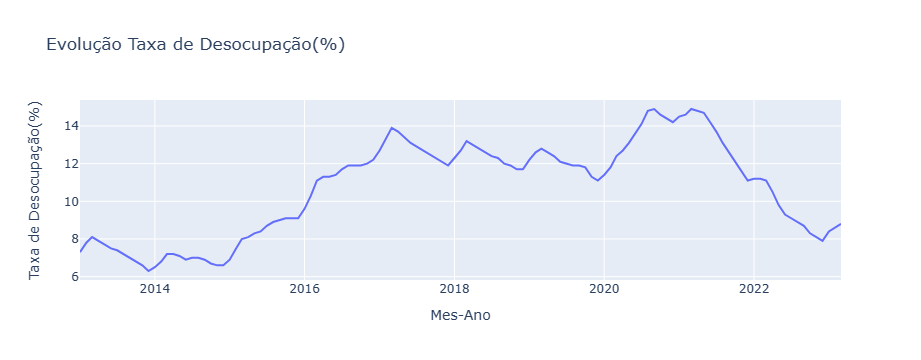

In [82]:
fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="Taxa de Desocupação(%)", title='Evolução Taxa de Desocupação(%)')

fig.show()


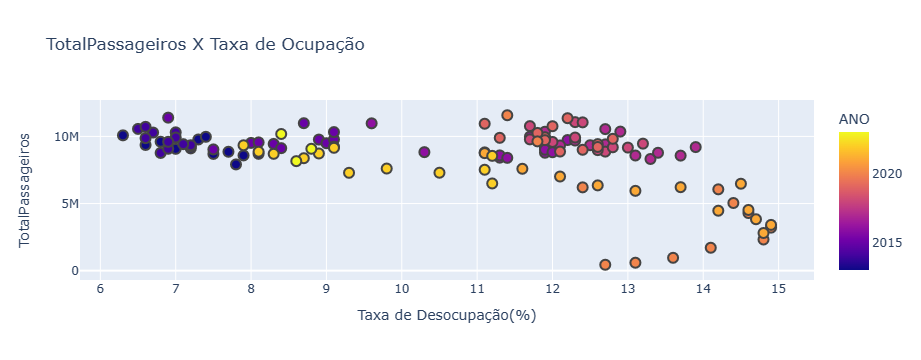

In [83]:
fig  = px.scatter(BaseConsolidada2, x = 'Taxa de Desocupação(%)', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X Taxa de Ocupação')
fig.update_traces(marker = dict(size=10, line = dict(width=2)),selector=dict(mode = 'markers'))

fig.show()

In [84]:
#fig = px.line(BaseConsolidada2.reset_index(), x="Mes-Ano", y="ICMS Brasil", title='Evolução Arrecadação ICMS')

#fig.show()

In [85]:
#fig  = px.scatter(BaseConsolidada2, x = 'ICMS Brasil', y = 'TotalPassageiros', color = 'ANO' ,width = 100, title='TotalPassageiros X ICMS')
#fig.update_traces(marker = dict(size=7, line = dict(width=2)),selector=dict(mode = 'markers'))

#fig.show()

## Analisando Correlação e Teste de Causalidade

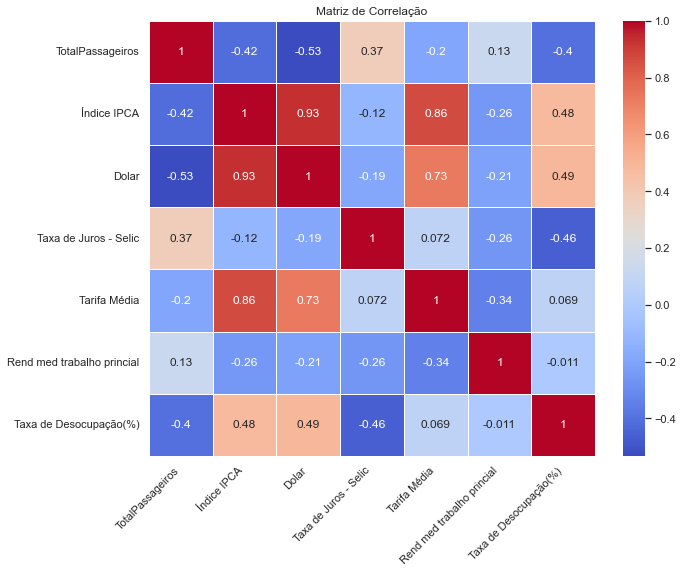

In [86]:
# Calcule a matriz de correlação
correlation_matrix = BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']].corr()
correlation_matrix = correlation_matrix.iloc[:, :]
sns.set(style="white")
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)
ax.set_title("Matriz de Correlação")
plt.xticks(rotation=45, ha='right')

plt.show()


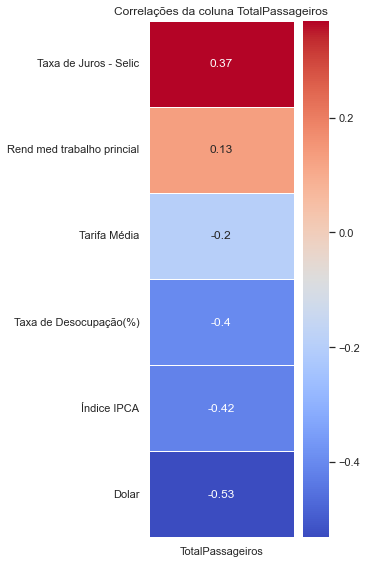

In [87]:
correlation_matrix = BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']].corr()
correlation_matrix = correlation_matrix.iloc[:, :]

# Selecione as correlações com a coluna de interesse
correlations = correlation_matrix['TotalPassageiros'].drop('TotalPassageiros').sort_values(ascending=False)


# Crie uma figura e um eixo para o gráfico de barras
fig, ax = plt.subplots(figsize=(5, 8))

# Use o seaborn para plotar um gráfico de barras das correlações
heatmap_data = pd.DataFrame({'TotalPassageiros': correlations})
# Use o seaborn para plotar o mapa de calor
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)

# Defina o título e rótulos dos eixos
ax.set_title(f"Correlações da coluna TotalPassageiros")

# Ajuste a rotação dos rótulos dos eixos x
plt.xticks(rotation=0, ha='center')

# Exiba o gráfico de barras
plt.tight_layout()
plt.show()

In [88]:
BaseConsolidada3[['Índice IPCA', 'Taxa de Juros - Selic']].corr()

Índice IPCA  Taxa de Juros - Selic
Índice IPCA               1.000000              -0.115669
Taxa de Juros - Selic    -0.115669               1.000000

In [89]:
BaseConsolidada2.columns

Index(['Mes-Ano', 'ANO', 'MES', 'TotalPassageiros', 'Índice IPCA', 'Dolar',
       'Taxa de Juros - Selic', 'Tarifa Média', 'Taxa de Desocupação(%)',
       'Rend med trabalho princial', 'Tarifa Média (log)',
       'TotalPassageiros (log)'],
      dtype='object')

In [90]:
BaseConsolidada2 = BaseConsolidada2[BaseConsolidada2['ANO']<2023]
BaseConsolidada2 = BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']]

In [91]:
BaseConsolidada3 = BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']]

In [92]:
BaseConsolidada3

TotalPassageiros  Índice IPCA   Dolar  Taxa de Juros - Selic  \
Mes-Ano                                                                    
2013-01-01         9771200.0      3633.44  1.9902                   7.25   
2013-02-01         7913824.0      3655.24  1.9795                   7.25   
2013-03-01         8702291.0      3672.42  2.0235                   7.25   
2013-04-01         8583971.0      3692.62  2.0010                   7.25   
2013-05-01         8856742.0      3706.28  2.1418                   7.50   
...                      ...          ...     ...                    ...   
2022-11-01         8860265.0      6434.20  5.1851                  13.75   
2022-12-01         9339419.0      6474.09  5.2860                  13.75   
2023-01-01        10180464.0      6508.40  5.0731                  13.75   
2023-02-01         8157666.0      6563.07  5.2367                  13.75   
2023-03-01         9078497.0      6609.67  5.0631                  13.75   

            Tarifa Média  Taxa de Desocupação(%)  Rend med trabalho princial  
Mes-Ano                                                                       
2013-01-01        537.22                     7.3                      2699.0  
2013-02-01        512.55                     7.8                      2716.0  
2013-03-01        482.12                     8.1                      2736.0  
2013-04-01        438.95                     7.9                      2742.0  
2013-05-01        441.59                     7.7                      2744.0  
...                  ...                     ...                         ...  
2022-11-01        940.08                     8.1                      2813.0  
2022-12-01        952.67                     7.9                      2819.0  
2023-01-01        895.37                     8.4                      2831.0  
2023-02-01        877.88                     8.6                      2833.0  
2023-03-01        918.62                     8.8                      2841.0  

[111 rows x 7 columns]

### Teste de Causation usando o teste de Granger
https://maisamelo.medium.com/tutorial-do-modelo-autorregressivo-vetorial-em-python-175bfb80e0d3

In [93]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=1

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

def ImprimeGT(data):
    variables=data.columns
    df = grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False)
    print(grangers_causation_matrix(df, variables=df.columns))
    return

ImprimeGT(BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']])

                                TotalPassageiros_x_x  Índice IPCA_x_x  \
TotalPassageiros_x_y                          1.0000           0.0000   
Índice IPCA_x_y                               0.0000           1.0000   
Dolar_x_y                                     0.5890           0.0000   
Taxa de Juros - Selic_x_y                     0.4173           0.7607   
Tarifa Média_x_y                              0.3363           0.9566   
Taxa de Desocupação(%)_x_y                    0.8346           0.2292   
Rend med trabalho princial_x_y                0.1294           0.9223   

                                Dolar_x_x  Taxa de Juros - Selic_x_x  \
TotalPassageiros_x_y               0.9736                     0.5485   
Índice IPCA_x_y                    0.7280                     0.0036   
Dolar_x_y                          1.0000                     0.3132   
Taxa de Juros - Selic_x_y          0.0000                     1.0000   
Tarifa Média_x_y                   0.0571              

# APLICAÇÃO MODELO VAR

### Verificando se cada série é estacionaria

In [94]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [95]:
# ADF Test on each column
for name, column in BaseConsolidada2[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n') 

    Augmented Dickey-Fuller Test on "TotalPassageiros" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8548
 No. Lags Chosen       = 12
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0509. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Índice IPCA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1452
 No. Lags Chosen       = 1
 Critical value 1%     = -3.492
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.9956. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Dolar" 
    -----------------------------------------------
 Null Hypothes

### Tornando a Serie Estacionária

In [96]:
# 1st difference
df_differenced = BaseConsolidada3.diff().dropna()

In [97]:
#df_differenced['Taxa de Juros - Selic'] = df_differenced['Taxa de Juros - Selic'].diff().dropna()

df_differenced2 = df_differenced.diff().dropna()

In [98]:
# ADF Test on each column
for name, column in df_differenced2[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n') 

    Augmented Dickey-Fuller Test on "TotalPassageiros" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.164
 No. Lags Chosen       = 12
 Critical value 1%     = -3.5
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0008. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Índice IPCA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3226
 No. Lags Chosen       = 7
 Critical value 1%     = -3.497
 Critical value 5%     = -2.891
 Critical value 10%    = -2.582
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dolar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

### Selecionando a ordem do modelo
Akaike Information Criterion (AIC) é uma métrica que mensura a qualidade de um modelo estatístico visando também a sua simplicidade. Fornece, portanto, uma métrica para comparação e seleção de modelos, em que menores valores de AIC representam uma maior qualidade e simplicidade, segundo este critério

In [99]:
from statsmodels.tsa.api import VAR

model = VAR(df_differenced2)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Lag Order = 1
AIC :  41.12474201580517
BIC :  42.51547672616587
FPE :  7.262313439804687e+17
HQIC:  41.68863442717906 

Lag Order = 2
AIC :  40.70011004247393
BIC :  43.32297945946926
FPE :  4.80267912349966e+17
HQIC:  41.76338642780015 

Lag Order = 3
AIC :  40.356684264286756
BIC :  44.22620898592126
FPE :  3.509843893012807e+17
HQIC:  41.92502368998935 

Lag Order = 4
AIC :  40.28953249976499
BIC :  45.42052251006953
FPE :  3.4856846105876634e+17
HQIC:  42.36871087502004 

Lag Order = 5
AIC :  39.861237278401745
BIC :  46.26879984170584
FPE :  2.524593029702327e+17
HQIC:  42.45712917792534 

Lag Order = 6
AIC :  39.8094599610097
BIC :  47.50900778098175
FPE :  2.8453543234588662e+17
HQIC:  42.92804046012006 

Lag Order = 7
AIC :  39.204703416792775
BIC :  48.2119630702192
FPE :  2.0268226173680042e+17
HQIC:  42.85204993558507 

Lag Order = 8
AIC :  38.74096767792072
BIC :  49.071988333560945
FPE :  1.9057369644987286e+17
HQIC:  42.92326183093354 

Lag Order = 9
AIC :  38.74239561350

In [100]:
LagSelect = model.select_order()
LagSelect .summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### Treinando o VAR com a ordem selecionada
Modelo autorregressivo vetorial (VAR) é um algoritmo de previsão usado quando duas ou mais séries influenciam-se mutuamente. Na prática, é um modelo de regressão que trata todas as variáveis como endógenas e permite que cada uma delas dependam de p valores de lags passados, esses valores são da própria série e das outras séries.

Conclusão:  
Menor AIC: 28,4  
Correspondente a: Lag order = 12  
Portanto a ordem utilizada para o VAR será 12.  

In [101]:
#Define a ordem do modelo
lag_order = 12

model_fitted = model.fit(lag_order)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 08, Oct, 2023
Time:                     19:08:03
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    44.2165
Nobs:                     97.0000    HQIC:                   34.8092
Log likelihood:          -1746.98    FPE:                1.91557e+15
AIC:                      28.4231    Det(Omega_mle):     2.33992e+13
--------------------------------------------------------------------
Results for equation TotalPassageiros
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                               2331.415216     52855.609445            0.044           0.965
L1.TotalPassageiros                   -1.518245         0.526643           -2.8

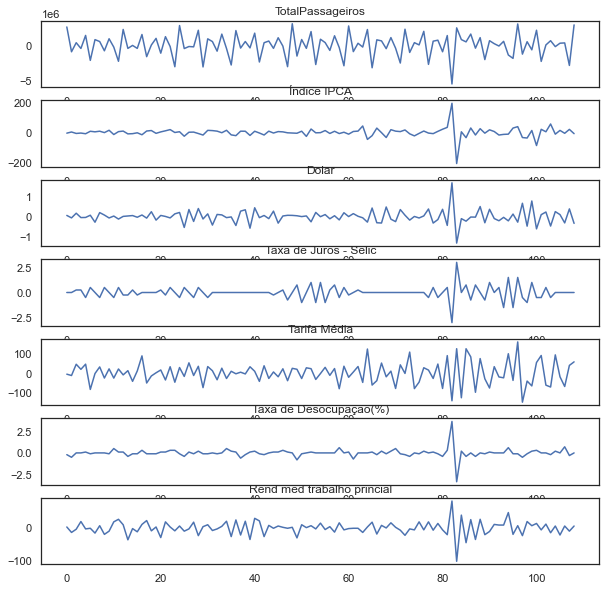

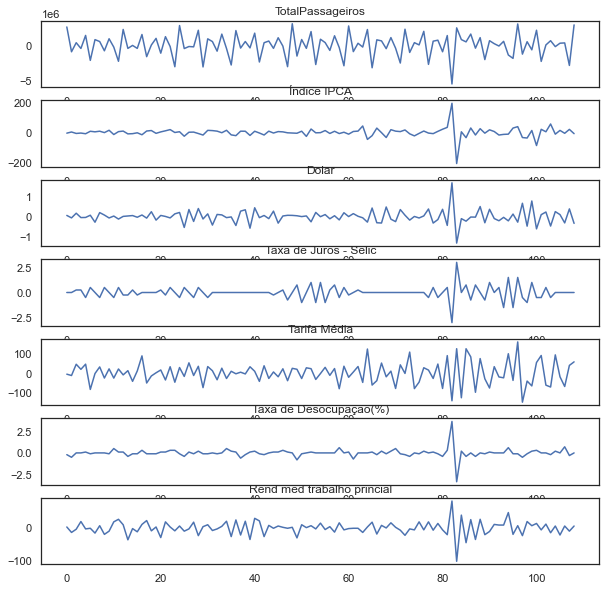

In [102]:
model_fitted.plot()

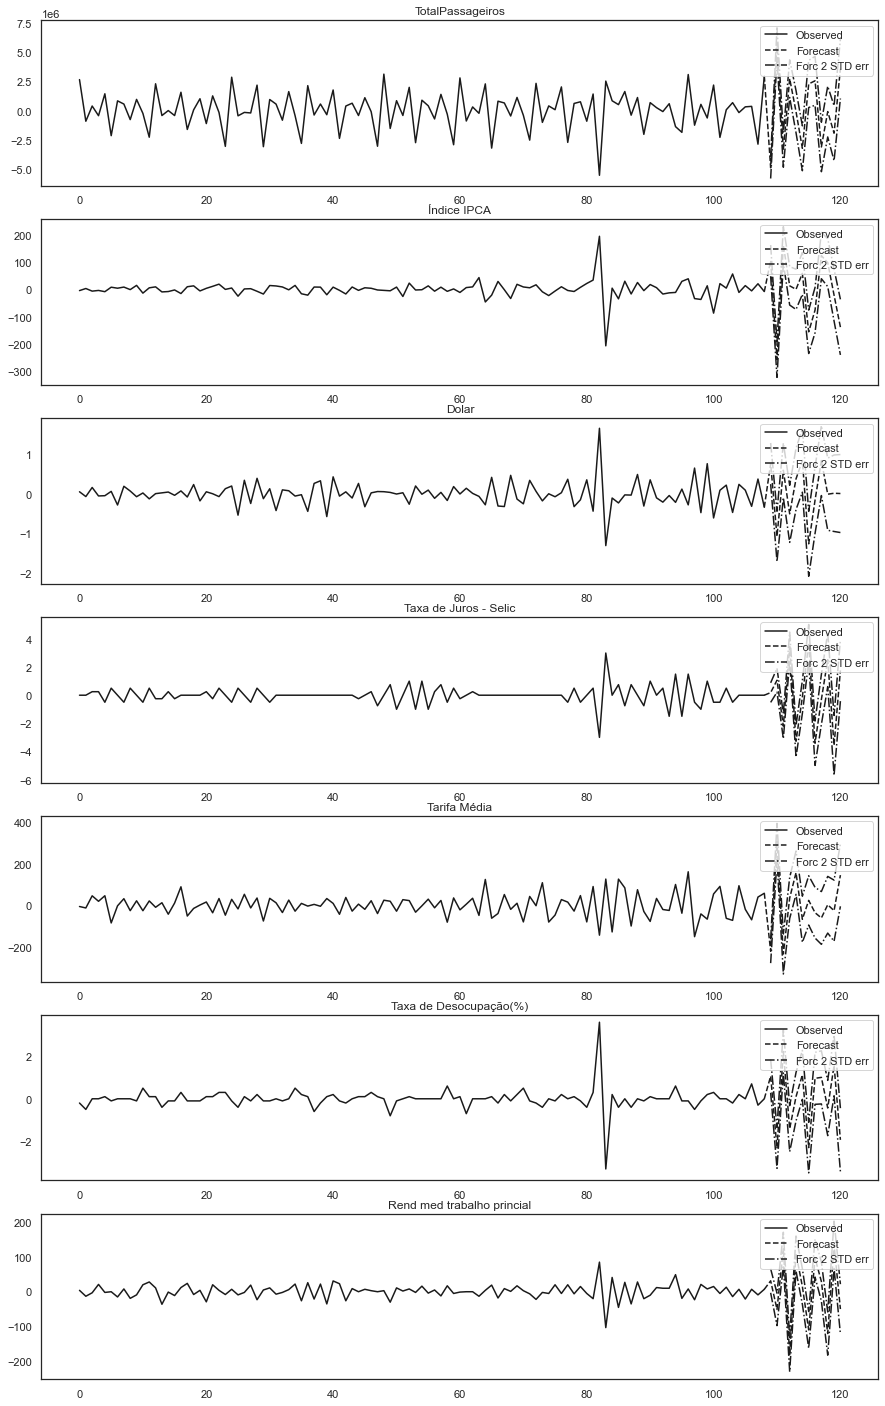

In [103]:
forecast_figure = model_fitted.plot_forecast(12)
forecast_figure.set_size_inches(15, 25)
#forecast_figure.legend(loc='upper left')

plt.show()


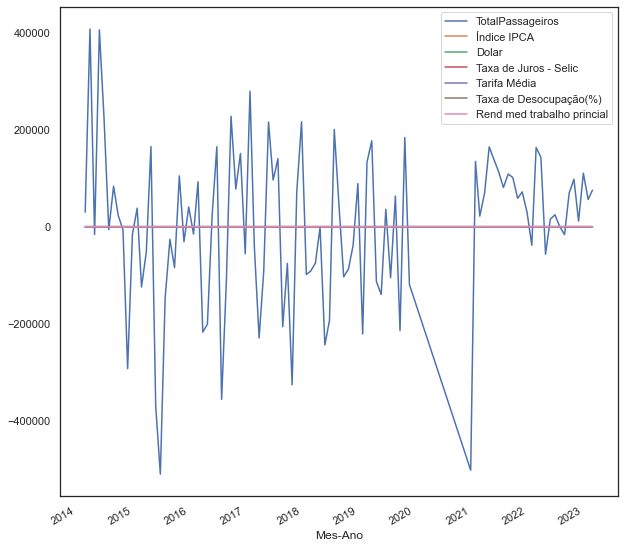

In [104]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fitted.resid)
residuals.plot(figsize = (10,10))
plt.show()


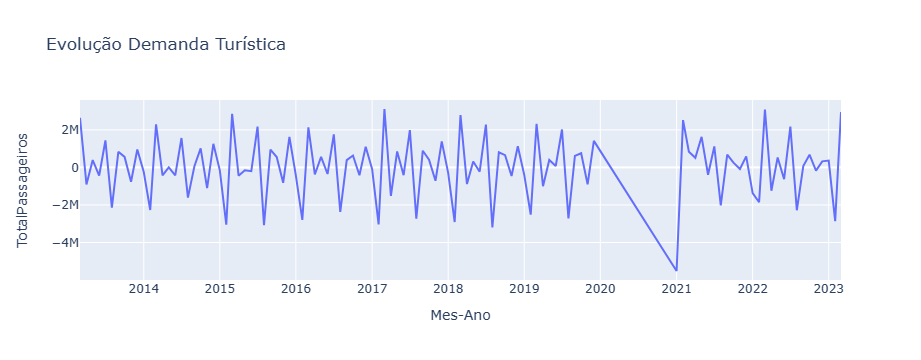

In [105]:
fig = px.line(df_differenced2.reset_index(), x="Mes-Ano", y="TotalPassageiros", title='Evolução Demanda Turística')
fig.show()

### Teste de Durbin Watson
- O teste de Durbin Watson permite analisar se há alguma correlação deixada nos resíduos.  
- Caso haja alguma correlação residual, isso significa que algum padrão das séries temporais ainda não foi explicado pelo modelo.

In [106]:
from statsmodels.stats.stattools import durbin_watson
def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']].columns, out):
    print(adjust(col), ':', round(val, 2))

TotalPassageiros : 1.76
Índice IPCA : 2.1
Dolar  : 1.86
Taxa de Juros - Selic : 2.13
Tarifa Média : 1.81
Taxa de Desocupação(%) : 2.04
Rend med trabalho princial : 2.38


Conclusão do teste de Durbin Watson
Como todas as estatísticas foram próximas a 2, não há correlação entre os erros da série

### Fazendo a previsão usando o VAR

In [107]:
forecast_input = df_differenced2.values[-lag_order:]
forecast_input

array([[-1.24357600e+06, -3.37400000e+01,  6.54000000e-01,
        -5.00000000e-01, -1.51360000e+02, -5.00000000e-01,
        -2.40000000e+01],
       [ 5.32796000e+05, -3.69500000e+01, -4.73700000e-01,
        -1.00000000e+00, -4.15500000e+01, -1.00000000e-01,
         2.00000000e+01],
       [-6.28298000e+05,  1.29700000e+01,  7.65300000e-01,
         1.00000000e+00, -6.67600000e+01,  2.00000000e-01,
         7.00000000e+00],
       [ 2.17874200e+06, -8.68700000e+01, -6.07500000e-01,
        -5.00000000e-01,  5.48600000e+01,  3.00000000e-01,
         1.40000000e+01],
       [-2.28406800e+06,  2.08200000e+01,  9.25000000e-02,
        -5.00000000e-01,  9.12900000e+01,  1.77635684e-15,
        -6.00000000e+00],
       [ 7.07720000e+04,  4.55000000e+00,  2.22600000e-01,
         5.00000000e-01, -6.28600000e+01, -1.77635684e-15,
         1.20000000e+01],
       [ 6.77887000e+05,  5.61200000e+01, -4.68600000e-01,
        -5.00000000e-01, -7.25800000e+01, -2.00000000e-01,
        -1.5000000

In [108]:
nobs = 30
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=BaseConsolidada3.index[-nobs:], columns=BaseConsolidada3.columns + '_2d')
df_forecast

TotalPassageiros_2d  Índice IPCA_2d  Dolar_2d  \
Mes-Ano                                                     
2019-10-01        -4.874996e+06      104.854042  0.767989   
2019-11-01         5.760339e+06     -256.248128 -1.073286   
2019-12-01        -3.359542e+06      161.652498  0.598545   
2021-01-01         2.726773e+06       12.885497 -0.503985   
2021-02-01        -8.456535e+04       -0.044453  0.380917   
2021-03-01        -3.214023e+06       58.109777  0.846540   
2021-04-01         2.274691e+06     -155.088728 -1.262196   
2021-05-01         2.542799e+06      -75.883118 -0.158441   
2021-06-01        -3.101592e+06      123.130590  0.844004   
2021-07-01        -8.398491e+04       97.449806 -0.006743   
2021-08-01        -1.927482e+06      -21.064459  0.017275   
2021-09-01         3.565734e+06     -137.953262  0.010021   
2021-10-01        -7.256960e+05      -32.393686 -1.543919   
2021-11-01        -3.100235e+05      228.822100  1.238765   
2021-12-01        -3.318854e+05        0.174604  0.060326   
2022-01-01        -2.497020e+06       27.246273  1.081284   
2022-02-01         1.428362e+06     -168.880773 -1.463174   
2022-03-01         3.104144e+06     -207.155046 -0.352763   
2022-04-01        -3.210549e+05       97.445681 -0.324280   
2022-05-01        -1.203717e+06      283.539675  1.479626   
2022-06-01         2.437517e+06     -251.908868 -0.535481   
2022-07-01        -4.850092e+06      150.123669  0.760911   
2022-08-01        -1.149925e+05      -44.404894 -0.894428   
2022-09-01         6.735746e+06      -90.636076 -0.485527   
2022-10-01        -8.330353e+06      259.640795  1.492924   
2022-11-01         3.178772e+05      -32.501538  0.214402   
2022-12-01         5.754437e+06     -322.610418 -2.082579   
2023-01-01        -4.143039e+06       84.570767  0.969395   
2023-02-01         4.684321e+06      -32.375298 -1.315819   
2023-03-01        -2.105066e+05      240.200069  0.808188   

            Taxa de Juros - Selic_2d  Tarifa Média_2d  \
Mes-Ano                                                 
2019-10-01                  0.185875      -221.558785   
2019-11-01                  1.063554       308.705816   
2019-12-01                 -2.200365      -235.016066   
2021-01-01                  3.463623        35.111496   
2021-02-01                 -3.273021       157.445836   
2021-03-01                 -0.134519       -67.399349   
2021-04-01                  3.713558        23.707932   
2021-05-01                 -3.415508       -35.649055   
2021-06-01                 -0.301496       -61.000313   
2021-07-01                  2.528082         2.774950   
2021-08-01                 -3.562026       -25.959813   
2021-09-01                  1.763509       145.686527   
2021-10-01                  4.820986      -103.025074   
2021-11-01                 -7.117411      -101.611977   
2021-12-01                  2.497052       440.488504   
2022-01-01                  0.304486      -460.812305   
2022-02-01                 -0.996003        60.136542   
2022-03-01                  3.264878       250.051052   
2022-04-01                 -1.260907      -320.478715   
2022-05-01                 -1.643406       102.582931   
2022-06-01                  0.351519       329.669084   
2022-07-01                 -2.031925      -463.726679   
2022-08-01                  4.264541       196.116313   
2022-09-01                 -2.572743       234.317373   
2022-10-01                 -1.450116      -444.449165   
2022-11-01                  4.052955        61.774806   
2022-12-01                 -5.440157       144.401737   
2023-01-01                  4.266444       -53.526219   
2023-02-01                  4.143095       185.688987   
2023-03-01                 -9.298357         6.894898   

            Taxa de Desocupação(%)_2d  Rend med trabalho princial_2d  
Mes-Ano                                                               
2019-10-01                   1.064994                      30.333321  
2019-11-01           

### Transformando as previsões para a escala original


In [109]:
def invert_transformation(df_train, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to the original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            # Create 'TotalPassageiros_2d' column if it doesn't exist
            if str(col)+'_2d' not in df_fc:
                df_fc[str(col)+'_2d'] = 0  # Initialize with zeros
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1] - df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
            df_fc[str(col)+'_2d'] = df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [110]:
df_results = invert_transformation(BaseConsolidada2, df_forecast, second_diff=True)        
df_results = df_results.drop(columns=['TotalPassageiros_1d','Índice IPCA_1d','Dolar_1d','Taxa de Juros - Selic_1d','Tarifa Média_1d','Taxa de Desocupação(%)_1d','Rend med trabalho princial_1d','TotalPassageiros_2d','Índice IPCA_2d','Dolar_2d','Taxa de Juros - Selic_2d','Tarifa Média_2d','Taxa de Desocupação(%)_2d','Rend med trabalho princial_2d'])
df_results


TotalPassageiros_forecast  Índice IPCA_forecast  Dolar_forecast  \
Mes-Ano                                                                       
2019-10-01               5.124332e+06           6761.124042        5.657489   
2019-11-01               6.930505e+06           6656.329956        5.178592   
2019-12-01               5.377137e+06           6713.188369        5.298239   
2021-01-01               6.550542e+06           6782.932279        4.913902   
2021-02-01               7.639381e+06           6852.631736        4.910482   
2021-03-01               5.514198e+06           6980.440969        5.753602   
2021-04-01               5.663706e+06           6953.161475        5.334526   
2021-05-01               8.356013e+06           6849.998862        4.757009   
2021-06-01               7.946728e+06           6869.966839        5.023495   
2021-07-01               7.453457e+06           6987.384622        5.283239   
2021-08-01               5.032705e+06           7083.737947        5.560257   
2021-09-01               6.177687e+06           7042.138010        5.847296   
2021-10-01               6.596973e+06           6968.144387        4.590416   
2021-11-01               6.706235e+06           7122.972863        4.572301   
2021-12-01               6.483612e+06           7277.975943        4.614512   
2022-01-01               3.763970e+06           7460.225297        5.738007   
2022-02-01               2.472689e+06           7473.593877        5.398328   
2022-03-01               4.285553e+06           7279.807411        4.705886   
2022-04-01               5.777361e+06           7183.466626        3.689164   
2022-05-01               6.065453e+06           7370.665517        4.152069   
2022-06-01               8.791062e+06           7305.955539        4.079492   
2022-07-01               6.666579e+06           7391.369231        4.767826   
2022-08-01               4.427104e+06           7432.378029        4.561732   
2022-09-01               8.923374e+06           7382.750751        3.870111   
2022-10-01               5.089291e+06           7592.764268        4.671414   
2022-11-01               1.573086e+06           7770.276248        5.687119   
2022-12-01               3.811317e+06           7625.177809        4.620244   
2023-01-01               1.906510e+06           7564.650138        4.522765   
2023-02-01               4.686024e+06           7471.747169        3.109466   
2023-03-01               7.255032e+06           7619.044268        2.504355   

            Taxa de Juros - Selic_forecast  Tarifa Média_forecast  \
Mes-Ano                                                             
2019-10-01                       13.935875             737.801215   
2019-11-01                       15.185304             865.688245   
2019-12-01                       14.234368             758.559211   
2021-01-01                       16.747055             686.541672   
2021-02-01                       15.986721             771.969969   
2021-03-01                       15.091869             789.998916   
2021-04-01                       17.910574             831.735795   
2021-05-01                       17.313772             837.823620   
2021-06-01                       16.415474             782.911132   
2021-07-01                       18.045258             730.773594   
2021-08-01                       16.113016             652.676244   
2021-09-01                       15.944282             720.265420   
2021-10-01                       20.596535             684.829522   
2021-11-01                       18.131377             547.781647   
2021-12-01                       18.163271             851.222276   
2022-01-01                       18.499652             693.850600   
2022-02-01                       17.840029             596.615466   
2022-03-01                       20.445284             749.431385   
2022-04-01                       21.789633             581.768588   
2022-05-01                       2

### Plota Previsões x Dados reais

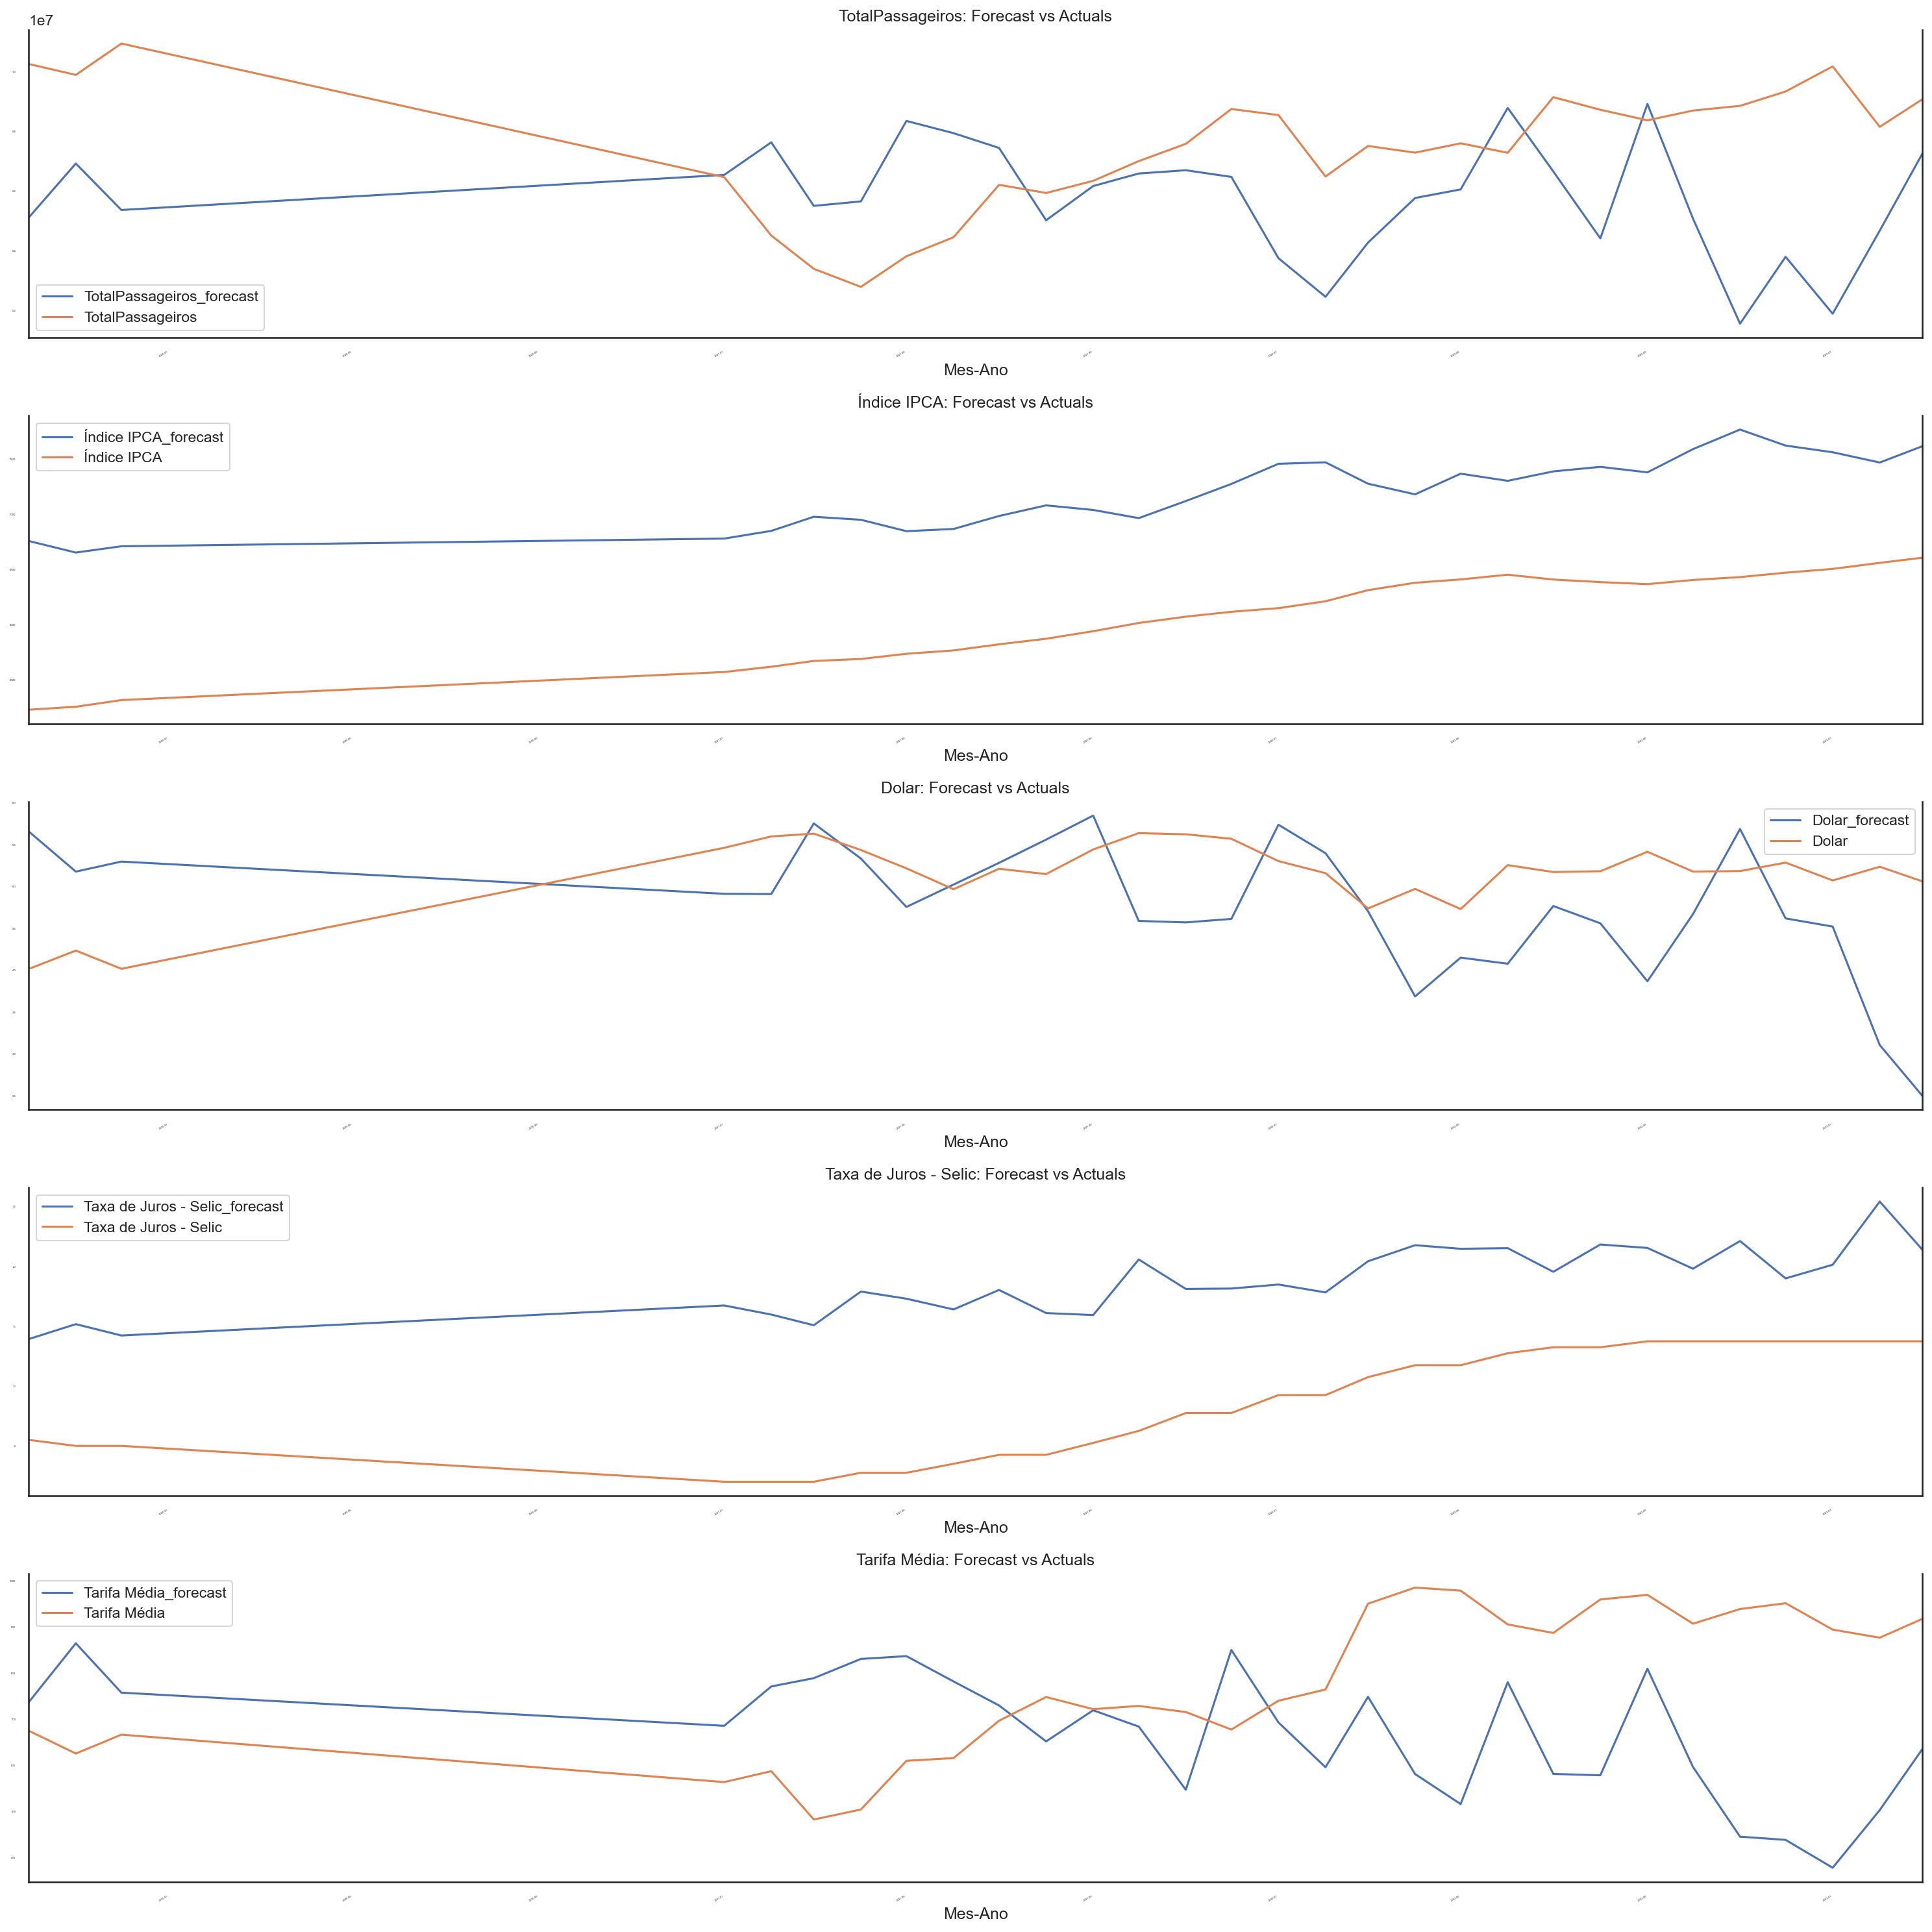

In [111]:
#Plota Previsões x Dados reais

fig, axes = plt.subplots(nrows=5, ncols=1, dpi=150, figsize=(20,20))
for i, (col,ax) in enumerate(zip(BaseConsolidada3.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    BaseConsolidada3[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=2)

plt.tight_layout();

### Analisando os resultados obtidos

In [112]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: TotalPassageiros')
accuracy_prod = forecast_accuracy(df_results['TotalPassageiros_forecast'].values, BaseConsolidada3['TotalPassageiros'][-nobs:])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: TotalPassageiros
mape   :  0.4249
me     :  -1691862.5901
mae    :  2988625.2032
mpe    :  -0.1069
rmse   :  3613002.7892
corr   :  -0.3314
minmax :  0.3554


C:\Users\jgjoa\AppData\Local\Temp\ipykernel_27236\2309422738.py:10: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\jgjoa\AppData\Local\Temp\ipykernel_27236\2309422738.py:12: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [113]:
A1 = model_fitted.coefs
print(f'Matriz A1: \n {A1[0]}')
print('\n') 

Matriz A1: 
 [[-1.51824453e+00 -1.59743151e+04  5.53226851e+05 -2.80185485e+05
  -4.68091466e+03 -1.07855566e+06  5.59222694e+03]
 [ 2.47620900e-05 -2.79716613e-03 -4.50092773e+00  2.14089099e+01
   1.17748175e-01 -2.22261398e+00  4.56993530e-01]
 [-1.60474949e-08 -2.95869599e-03 -9.91620943e-01 -1.45260331e-01
  -6.39067228e-04  2.51535172e-01  3.04959165e-03]
 [-3.88304723e-07 -5.91960419e-04  2.83566560e-01 -2.73132256e-01
   2.29815705e-03 -6.07874135e-01  1.21343407e-02]
 [-2.95808733e-06 -4.08995005e-01  2.40984097e+01 -2.43647408e+01
  -9.73662345e-01 -4.72073945e+00  3.20080358e-01]
 [ 2.96578056e-07  4.18781138e-03 -6.40847636e-01  7.66665032e-02
   2.37082941e-03 -2.60744964e-01  4.66844557e-03]
 [ 8.95549417e-06 -3.75713172e-02 -3.80550269e+01 -1.09030153e+01
  -1.09764669e-01  1.38684636e+01 -7.54830200e-01]]




## Regressão

https://betterdatascience.com/lime/?utm_content=cmp-true

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm


In [115]:
X = BaseConsolidada3[['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']]
y = BaseConsolidada3['TotalPassageiros']

regression = LinearRegression()


In [116]:
missing_values = BaseConsolidada3.isnull().sum()
print(missing_values)

TotalPassageiros              0
Índice IPCA                   0
Dolar                         0
Taxa de Juros - Selic         0
Tarifa Média                  0
Taxa de Desocupação(%)        0
Rend med trabalho princial    0
dtype: int64


In [117]:
# Preencher valores ausentes usando a estratégia da média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(BaseConsolidada3[['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']])
y = BaseConsolidada3['TotalPassageiros']

In [118]:
regression.fit(X, y)

LinearRegression()

In [119]:
coefficients = regression.coef_
coefficients

array([-3.30150381e+02, -1.03560887e+06,  1.27319102e+05,  5.60261681e+03,
        4.99758572e+03,  8.43058658e+04])

In [120]:
intercept = regression.intercept_
intercept

-4958117.715687161

In [121]:
# Converter o objeto X de volta em DataFrame
X_df = pd.DataFrame(X, columns=['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)'])

# Criar um DataFrame para visualizar os coeficientes e interceptos
intercept_df = pd.DataFrame({'Variável': ['Intercepto'] + list(X_df.columns), 'Coeficiente': [regression.intercept_] + list(regression.coef_)})

# Exibir o DataFrame
print(intercept_df)

                     Variável   Coeficiente
0                  Intercepto -4.958118e+06
1                 Índice IPCA -3.301504e+02
2                       Dolar -1.035609e+06
3       Taxa de Juros - Selic  1.273191e+05
4                Tarifa Média  5.602617e+03
5  Rend med trabalho princial  4.997586e+03
6      Taxa de Desocupação(%)  8.430587e+04


In [122]:
# Converter o objeto X de volta em DataFrame
X_df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4','X5','X6'])

# Criar uma lista de termos da fórmula
formula_terms = [f'{coef:.2f} * {variable}' for coef, variable in zip(regression.coef_, X_df.columns)]

# Adicionar o termo do intercepto
formula_terms.append(f'{regression.intercept_:.2f}')

# Criar a fórmula completa
formula = f'y = {" + ".join(formula_terms)}'

# Exibir a fórmula
print(formula)

y = -330.15 * X1 + -1035608.87 * X2 + 127319.10 * X3 + 5602.62 * X4 + 4997.59 * X5 + 84305.87 * X6 + -4958117.72


In [123]:
# Adicionar constante ao X para a regressão linear
X = sm.add_constant(X)

# Criar o modelo de regressão
model = sm.OLS(y, X)

# Ajustar o modelo
results = model.fit()


In [124]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       TotalPassageiros   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     13.07
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.67e-11
Time:                        19:08:24   Log-Likelihood:                -1708.8
No. Observations:                 111   AIC:                             3432.
Df Residuals:                     104   BIC:                             3451.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.958e+06   6.51e+06     -0.762      0.4

## Reg Log

In [125]:
X_log = np.log(X)
y_log = np.log(y)

In [126]:
regression.fit(X_log, y_log)

LinearRegression()

In [127]:
#X

In [128]:
coefficients = regression.coef_
coefficients

array([ 0.        , -1.32582773, -0.16765547,  0.31147797,  0.93900706,
        3.02738085,  0.43534366])

In [129]:
intercept = regression.intercept_
intercept

-4.224881456838682

In [130]:
# Converter o objeto X de volta em DataFrame
Xlog_df = pd.DataFrame(X_log, columns=['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)'])

# Criar um DataFrame para visualizar os coeficientes e interceptos
intercept_df = pd.DataFrame({'Variável': ['Intercepto'] + list(Xlog_df.columns), 'Coeficiente': [regression.intercept_] + list(regression.coef_)})

# Exibir o DataFrame
print(intercept_df)

ValueError: Shape of passed values is (111, 7), indices imply (111, 6)

In [ ]:
# Converter o objeto X de volta em DataFrame
Xlog_df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4','X5','X6'])

# Criar uma lista de termos da fórmula
formula_terms = [f'{coef:.2f} * {variable}' for coef, variable in zip(regression.coef_, Xlog_df.columns)]

# Adicionar o termo do intercepto
formula_terms.append(f'{regression.intercept_:.2f}')

# Criar a fórmula completa
formula = f'y = {" + ".join(formula_terms)}'

# Exibir a fórmula
print(formula)

# Aplicação VARIMA

In [173]:
from statsmodels.tsa.api import VARMAX
from sklearn.metrics import mean_absolute_percentage_error
df_differenced2

In [191]:
Baselog = np.log(BaseConsolidada3)

In [192]:
order = (1,1)
Varima = VARMAX(BaseConsolidada3[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']], order=order)
Varima_fit = model.fit()

VarimaDif = VARMAX(df_differenced2[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']], order=order)
VarimaDif_fit = model.fit()

Varimalog = VARMAX(Baselog[['TotalPassageiros','Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Rend med trabalho princial','Taxa de Desocupação(%)']], order=order)
Varimalog_fit = model.fit()



C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\jgjoa\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:214: LinAlgWarning:

Ill-conditioned matrix (rcond=4.03878e-25): result may not be accurate.

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmo

In [159]:
print(Varima_fit.summary())

                                                                                         Statespace Model Results                                                                                        
Dep. Variable:     ['TotalPassageiros', 'Índice IPCA', 'Dolar', 'Taxa de Juros - Selic', 'Tarifa Média', 'Rend med trabalho princial', 'Taxa de Desocupação(%)']   No. Observations:                  111
Model:                                                                                                                                                VARMA(1,1)   Log Likelihood              -18038.707
                                                                                                                                                     + intercept   AIC                          36343.413
Date:                                                                                                                                           Sun, 17 Sep 2023   BIC                          

In [205]:
Varima_fit.resid

TotalPassageiros  Índice IPCA     Dolar  Taxa de Juros - Selic  \
Mes-Ano                                                                      
2013-01-01      4.124049e+05 -1344.871808 -1.747981              -2.474696   
2013-02-01     -4.865550e+06  -646.927261  0.098013              -2.385219   
2013-03-01     -4.478993e+06  -723.081960  0.129187              -2.476565   
2013-04-01     -5.022956e+06  -578.267689  0.458272              -2.157236   
2013-05-01     -5.055657e+06  -612.979744  0.699681              -1.849345   
...                      ...          ...       ...                    ...   
2022-11-01     -2.984779e+06   699.744303 -0.189631               3.524432   
2022-12-01     -2.269067e+06   780.973110 -0.240325               3.559115   
2023-01-01     -1.428244e+06   725.981372 -0.625893               3.485207   
2023-02-01     -2.953982e+06   793.576505 -0.336435               3.747808   
2023-03-01     -1.926971e+06   823.703803 -0.491376               3.722597   

            Tarifa Média  Rend med trabalho princial  Taxa de Desocupação(%)  
Mes-Ano                                                                       
2013-01-01    -69.512513                  -85.462166               -3.258427  
2013-02-01    -38.439233                  -95.946672               -2.020173  
2013-03-01    -88.296351                  -79.861246               -2.068466  
2013-04-01   -127.425909                  -84.096169               -1.748337  
2013-05-01   -126.590425                  -78.810968               -1.866556  
...                  ...                         ...                     ...  
2022-11-01    211.845752                   48.112811               -3.899298  
2022-12-01    221.494779                   49.841926               -3.990107  
2023-01-01    153.667810                   67.161290               -3.544036  
2023-02-01    143.306029                   64.845542               -3.156362  
2023-03-01    189.260796                   74.187702               -3.117418  

[111 rows x 7 columns]

In [206]:
VarimaDif_fit.resid

TotalPassageiros  Índice IPCA     Dolar  Taxa de Juros - Selic  \
Mes-Ano                                                                      
2013-01-01      4.124049e+05 -1344.871808 -1.747981              -2.474696   
2013-02-01     -4.865550e+06  -646.927261  0.098013              -2.385219   
2013-03-01     -4.478993e+06  -723.081960  0.129187              -2.476565   
2013-04-01     -5.022956e+06  -578.267689  0.458272              -2.157236   
2013-05-01     -5.055657e+06  -612.979744  0.699681              -1.849345   
...                      ...          ...       ...                    ...   
2022-11-01     -2.984779e+06   699.744303 -0.189631               3.524432   
2022-12-01     -2.269067e+06   780.973110 -0.240325               3.559115   
2023-01-01     -1.428244e+06   725.981372 -0.625893               3.485207   
2023-02-01     -2.953982e+06   793.576505 -0.336435               3.747808   
2023-03-01     -1.926971e+06   823.703803 -0.491376               3.722597   

            Tarifa Média  Rend med trabalho princial  Taxa de Desocupação(%)  
Mes-Ano                                                                       
2013-01-01    -69.512513                  -85.462166               -3.258427  
2013-02-01    -38.439233                  -95.946672               -2.020173  
2013-03-01    -88.296351                  -79.861246               -2.068466  
2013-04-01   -127.425909                  -84.096169               -1.748337  
2013-05-01   -126.590425                  -78.810968               -1.866556  
...                  ...                         ...                     ...  
2022-11-01    211.845752                   48.112811               -3.899298  
2022-12-01    221.494779                   49.841926               -3.990107  
2023-01-01    153.667810                   67.161290               -3.544036  
2023-02-01    143.306029                   64.845542               -3.156362  
2023-03-01    189.260796                   74.187702               -3.117418  

[111 rows x 7 columns]

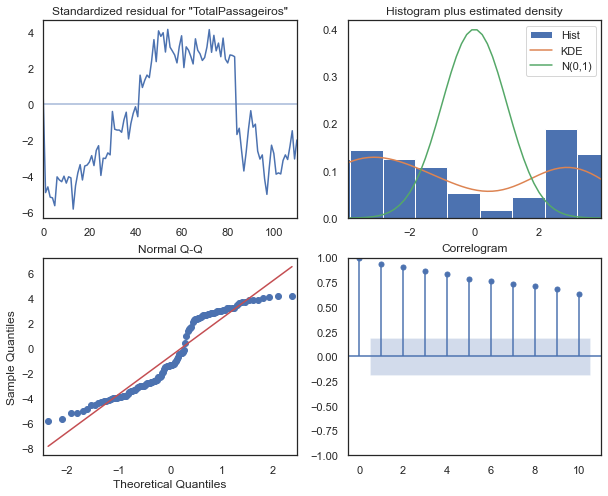

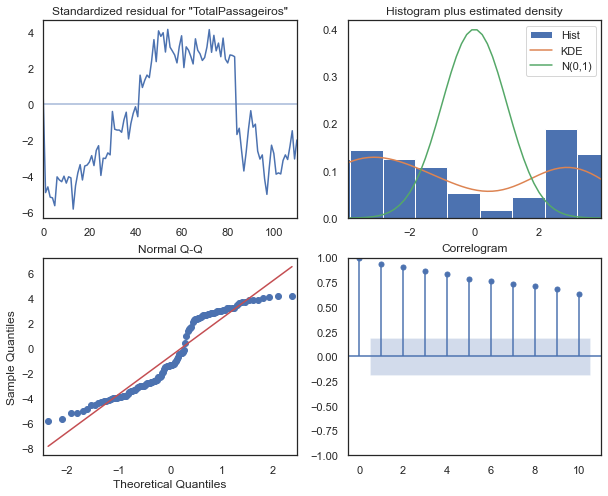

In [160]:
Varima_fit.plot_diagnostics(figsize=(10, 8))


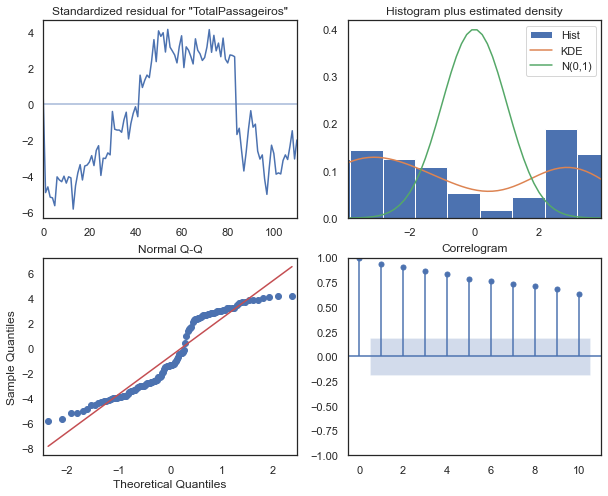

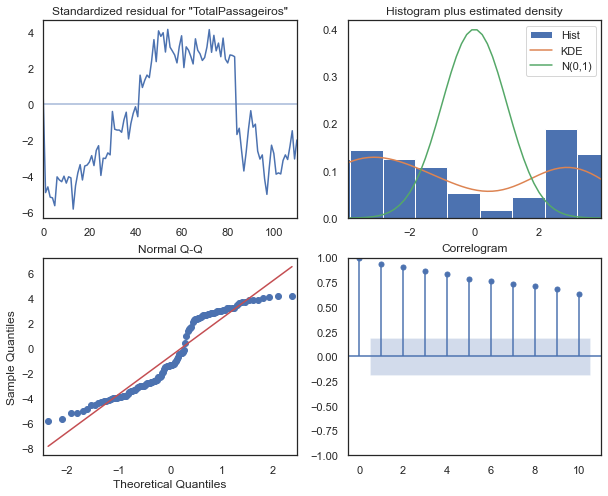

In [184]:
VarimaDif_fit.plot_diagnostics(figsize=(10, 8))

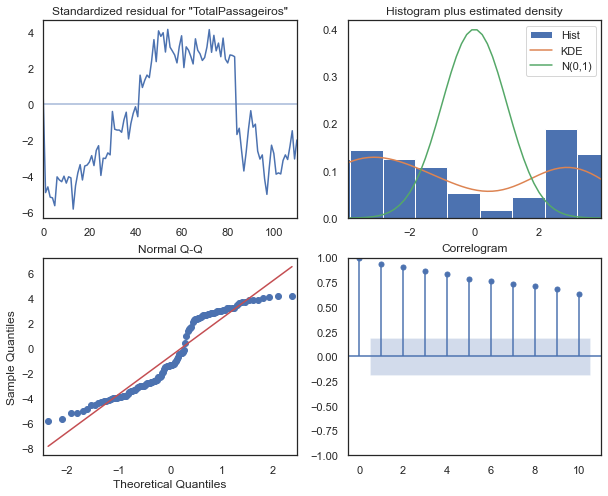

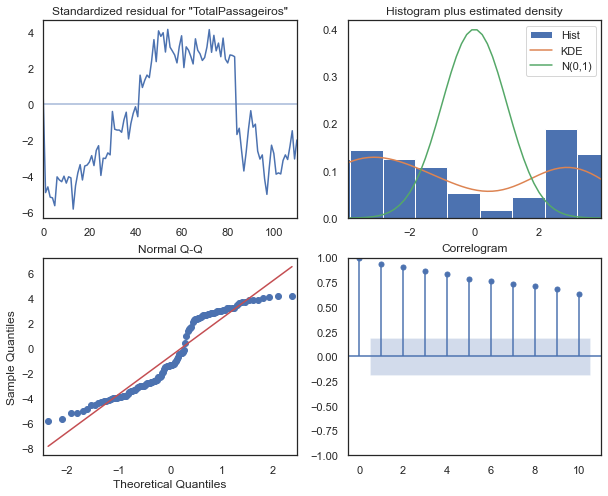

In [193]:
Varimalog_fit.plot_diagnostics(figsize=(10, 8))


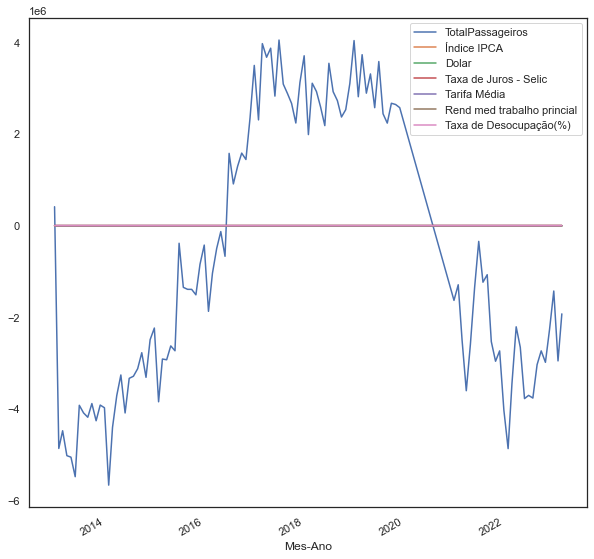

In [202]:
# line plot of residuals
residuals = DataFrame(Varima_fit['TotalPassageiros'].resid)
residuals = DataFrame(Varima_fit.resid)
residuals.plot(figsize = (10,10))
plt.show()


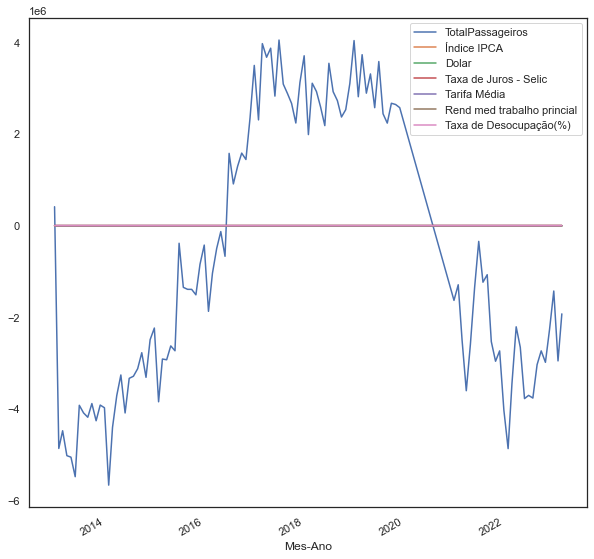

In [185]:
# line plot of residuals
residuals = DataFrame(VarimaDif_fit.resid)
residuals.plot(figsize = (10,10))
plt.show()

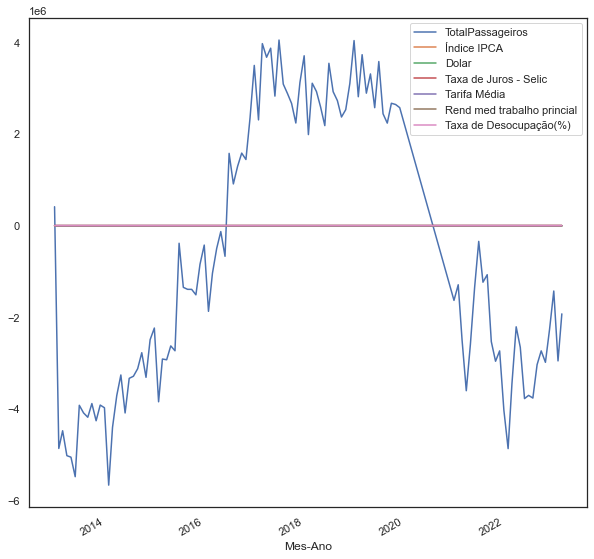

In [194]:
# line plot of residuals
residuals = DataFrame(Varimalog_fit.resid)
residuals.plot(figsize = (10,10))
plt.show()

In [166]:
nobs = 12
fc = Varima_fit.predict(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=BaseConsolidada3.index[-nobs:], columns=BaseConsolidada3.columns + '_1d')
df_forecast

TotalPassageiros_1d  Índice IPCA_1d  Dolar_1d  \
Mes-Ano                                                     
2022-04-01                  NaN             NaN       NaN   
2022-05-01                  NaN             NaN       NaN   
2022-06-01                  NaN             NaN       NaN   
2022-07-01                  NaN             NaN       NaN   
2022-08-01                  NaN             NaN       NaN   
2022-09-01                  NaN             NaN       NaN   
2022-10-01                  NaN             NaN       NaN   
2022-11-01                  NaN             NaN       NaN   
2022-12-01                  NaN             NaN       NaN   
2023-01-01                  NaN             NaN       NaN   
2023-02-01                  NaN             NaN       NaN   
2023-03-01                  NaN             NaN       NaN   

            Taxa de Juros - Selic_1d  Tarifa Média_1d  \
Mes-Ano                                                 
2022-04-01                       NaN              NaN   
2022-05-01                       NaN              NaN   
2022-06-01                       NaN              NaN   
2022-07-01                       NaN              NaN   
2022-08-01                       NaN              NaN   
2022-09-01                       NaN              NaN   
2022-10-01                       NaN              NaN   
2022-11-01                       NaN              NaN   
2022-12-01                       NaN              NaN   
2023-01-01                       NaN              NaN   
2023-02-01                       NaN              NaN   
2023-03-01                       NaN              NaN   

            Taxa de Desocupação(%)_1d  Rend med trabalho princial_1d  
Mes-Ano                                                               
2022-04-01                        NaN                            NaN  
2022-05-01                        NaN                            NaN  
2022-06-01                        NaN                            NaN  
2022-07-01                        NaN                            NaN  
2022-08-01                        NaN                            NaN  
2022-09-01                        NaN                            NaN  
2022-10-01                        NaN                            NaN  
2022-11-01                        NaN                            NaN  
2022-12-01                        NaN                            NaN  
2023-01-01                        NaN                            NaN  
2023-02-01                        NaN                            NaN  
2023-03-01                        NaN                            NaN

In [188]:
df_differenced2

TotalPassageiros  Índice IPCA   Dolar  Taxa de Juros - Selic  \
Mes-Ano                                                                    
2013-03-01         2645843.0        -4.62  0.0547                   0.00   
2013-04-01         -906787.0         3.02 -0.0665                   0.00   
2013-05-01          391091.0        -6.54  0.1633                   0.25   
2013-06-01         -433879.0        -4.02 -0.0511                   0.25   
2013-07-01         1435713.0        -8.53 -0.0448                  -0.50   
...                      ...          ...     ...                    ...   
2022-11-01         -168477.0       -11.32  0.2423                   0.00   
2022-12-01          321524.0        13.62  0.0949                   0.00   
2023-01-01          361891.0        -5.58 -0.3138                   0.00   
2023-02-01        -2863843.0        20.36  0.3765                   0.00   
2023-03-01         2943629.0        -8.07 -0.3372                   0.00   

            Tarifa Média  Taxa de Desocupação(%)  Rend med trabalho princial  
Mes-Ano                                                                       
2013-03-01         -5.76           -2.000000e-01                         3.0  
2013-04-01        -12.74           -5.000000e-01                       -14.0  
2013-05-01         45.81           -8.881784e-16                        -4.0  
2013-06-01         19.41            0.000000e+00                        20.0  
2013-07-01         46.19            1.000000e-01                        -3.0  
...                  ...                     ...                         ...  
2022-11-01         94.57            2.000000e-01                         6.0  
2022-12-01        -19.32            1.776357e-15                       -22.0  
2023-01-01        -69.89            7.000000e-01                         6.0  
2023-02-01         39.81           -3.000000e-01                       -10.0  
2023-03-01         58.23            1.776357e-15                         6.0  

[109 rows x 7 columns]

In [198]:
# Calcule métricas de desempenho
predicted_values = Varima_fit.forecast(steps=111) 
actual_values = BaseConsolidada3

predicted_values_Dif = VarimaDif_fit.forecast(steps=109) 
actual_values_Dif = df_differenced2

predicted_values_log = Varimalog_fit.forecast(steps=111) 
actual_values_log = Baselog

# Calcule métricas de desempenho
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

mae_dif = mean_absolute_error(actual_values_Dif, predicted_values_Dif)
mse_dif = mean_squared_error(actual_values_Dif, predicted_values_Dif)

mae_log = mean_absolute_error(actual_values_log, predicted_values_log)
mse_log = mean_squared_error(actual_values_log, predicted_values_log)

# Exiba as métricas
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

print(f"Mean Absolute Error (MAE) Dif: {mae_dif}")
print(f"Mean Squared Error (MSE) Dif: {mse_dif}")

print(f"Mean Absolute Error (MAE) Log: {mae_log}")
print(f"Mean Squared Error (MSE) Log: {mse_log}")

Mean Absolute Error (MAE): 146805.39655088063
Mean Squared Error (MSE): 365783695037.43085
Mean Absolute Error (MAE) Dif: 1335566.8550809515
Mean Squared Error (MSE) Dif: 12836544810787.2
Mean Absolute Error (MAE) Log: 1339182.1277451809
Mean Squared Error (MSE) Log: 12532742095528.94


C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [200]:
fcst = Varima_fit.forecast(exog=BaseConsolidada3.values, steps=111)
mape = mean_absolute_percentage_error(BaseConsolidada3, fcst)
model_accuracy = 1 - mape
print(model_accuracy)

-39.7499924740089


C:\Users\jgjoa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



# APLICAÇÃO MODELO LSTM
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [72]:
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [73]:
# integer encode direction
values = BaseConsolidada3.values
encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])

values.shape

(111, 7)

In [74]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [75]:
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.810732   0.000000   0.002925   0.428571   0.192337   0.116279   
2   0.594591   0.007325   0.000000   0.428571   0.148000   0.174419   
3   0.686344   0.013097   0.012029   0.428571   0.093311   0.209302   
4   0.672575   0.019884   0.005878   0.428571   0.015725   0.186046   
5   0.704317   0.024474   0.044372   0.448980   0.020470   0.162791   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.113924  0.594591  0.007325  0.000000  0.428571  0.148000  0.174419   
2   0.139241  0.686344  0.013097  0.012029  0.428571  0.093311  0.209302   
3   0.189873  0.672575  0.019884  0.005878  0.428571  0.015725  0.186046   
4   0.227848  0.704317  0.024474  0.044372  0.448980  0.020470  0.162791   
5   0.240506  0.685569  0.027713  0.068896  0.489796  0.060098  0.139535   

    var7(t)  
1  0.139241  
2  0.189873  
3  0.227848  
4  0.240506  
5  0.367089  


In [76]:
# split into train and test sets
values = reframed.values
n_train_hours = 1000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(110, 1, 13) (110,) (0, 1, 13) (0,)


In [77]:
X = BaseConsolidada3[['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']]
Y = BaseConsolidada3['TotalPassageiros']

In [78]:
values.shape

(110, 14)

In [194]:
pip install --upgrade tensorflow


  Using cached tensorflow-2.14.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.14.0-cp39-cp39-win_amd64.whl (284.1 MB)
  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4



ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\jgjoa\\anaconda3\\Lib\\site-packages\\numpy\\~libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
conda create -n myenv python=3.7
conda activate myenv
pip install tensorflow

SyntaxError: invalid syntax (1650593038.py, line 1)

In [97]:
pip install tensorflow

  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
Note: you 

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\jgjoa\\anaconda3\\Lib\\site-packages\\~~nsorflow\\tsl\\python\\lib\\core\\ml_dtypes.so'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.14.0
    Uninstalling tensorflow-intel-2.14.0:
      Successfully uninstalled tensorflow-intel-2.14.0


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from keras.layers import concatenate


In [83]:
input_shape=(train_X.shape[1], train_X.shape[2])
input_shape

(1, 13)

Epoch 1/50
2/2 - 3s - loss: 0.5640 - 3s/epoch - 1s/step
Epoch 2/50
2/2 - 0s - loss: 0.5201 - 39ms/epoch - 19ms/step
Epoch 3/50
2/2 - 0s - loss: 0.4767 - 45ms/epoch - 23ms/step
Epoch 4/50
2/2 - 0s - loss: 0.4362 - 43ms/epoch - 22ms/step
Epoch 5/50
2/2 - 0s - loss: 0.4005 - 37ms/epoch - 18ms/step
Epoch 6/50
2/2 - 0s - loss: 0.3686 - 40ms/epoch - 20ms/step
Epoch 7/50
2/2 - 0s - loss: 0.3398 - 41ms/epoch - 21ms/step
Epoch 8/50
2/2 - 0s - loss: 0.3140 - 41ms/epoch - 21ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2912 - 45ms/epoch - 23ms/step
Epoch 10/50
2/2 - 0s - loss: 0.2727 - 45ms/epoch - 22ms/step
Epoch 11/50
2/2 - 0s - loss: 0.2588 - 79ms/epoch - 40ms/step
Epoch 12/50
2/2 - 0s - loss: 0.2490 - 65ms/epoch - 33ms/step
Epoch 13/50
2/2 - 0s - loss: 0.2419 - 31ms/epoch - 15ms/step
Epoch 14/50
2/2 - 0s - loss: 0.2358 - 48ms/epoch - 24ms/step
Epoch 15/50
2/2 - 0s - loss: 0.2311 - 65ms/epoch - 33ms/step
Epoch 16/50
2/2 - 0s - loss: 0.2284 - 50ms/epoch - 25ms/step
Epoch 17/50
2/2 - 0s - loss: 0.2273 -

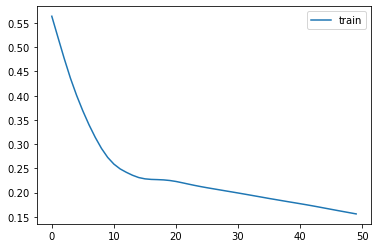

In [80]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
#history = model.fit(X, Y, epochs=50, batch_size=72, validation_data=(X, Y), verbose=2, shuffle=False)
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [132]:
tensorflow.config.run_functions_eagerly(True)



NameError: name 'tensorflow' is not defined

In [235]:
# make a prediction
yhat = model.predict(train_X)
test_X = train_X
# invert scaling for forecast
#inv_yhat = np.concatenate((yhat, train_X[:, 1:]), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,0]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:,0]
# calculate RMSE


rmse = np.sqrt(mean_squared_error(train_y,yhat))
mae = mean_absolute_error(train_y,yhat)
mse = mean_squared_error(train_y,yhat)

print('Resultados:')
print('Test RMSE: %.3f' % rmse)
print('Test MAE:%.3f' % mae)
print('Test MSE: %f' % mse)

4/4 [==============================] - 0s 2ms/step
Resultados:
Test RMSE: 0.183
Test MAE:0.152
Test MSE: 0.033647


In [236]:
mean_squared_error(train_y,yhat)

0.033646684

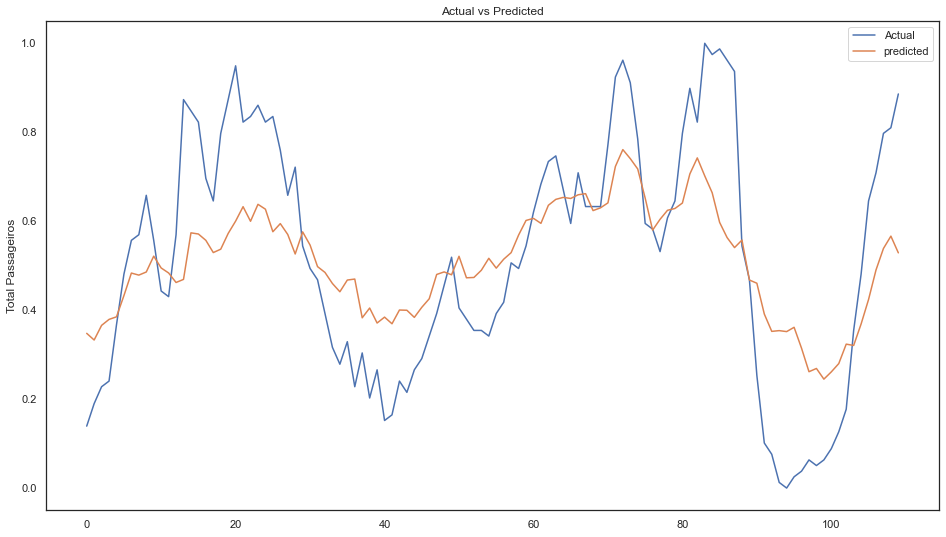

In [237]:
plt.figure(figsize=(16,9))
plt.plot(train_y)
plt.plot(yhat)
plt.title("Actual vs Predicted")
plt.ylabel("Total Passageiros")
plt.legend(('Actual','predicted'))
plt.show() 

In [224]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [245]:
# make a prediction
yhat = model.predict(train_X)
test_X = train_X[:, :13]

# invert scaling for forecast
inv_yhat = inv_yhat.reshape(-1, 1)
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

4/4 [==============================] - 0s 5ms/step


ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=((110, 1), (110, 0, 13))

In [250]:
# Inverta a normalização das previsões do modelo
inv_yhat = scaler.inverse_transform(yhat.reshape(-1, 1))
inv_yhat = inv_yhat[:, 0]  # Pegue a primeira coluna

# Inverta a normalização dos valores reais
inv_y = scaler.inverse_transform(test_y.reshape(-1, 1))[:, 0]

# Crie um array de índices de tempo para plotagem
time_index = np.arange(len(inv_y))

# Plote os valores reais em azul
plt.plot(time_index, inv_y, label='Valores Reais', color='blue')

# Plote as previsões do modelo em vermelho
plt.plot(time_index, inv_yhat, label='Previsões do Modelo', color='red')

plt.title('Dados Reais vs. Previsões do Modelo')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

ValueError: non-broadcastable output operand with shape (110,1) doesn't match the broadcast shape (110,7)

In [248]:
yhat.shape

(110, 1)

# APLICAÇÃO LSTM 2
https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/


In [ ]:
import tensorflow as tf 

In [ ]:
X = BaseConsolidada3[['Índice IPCA','Dolar','Taxa de Juros - Selic','Tarifa Média','Taxa de Desocupação(%)','Rend med trabalho princial']]
Y = BaseConsolidada3['TotalPassageiros']

In [ ]:
Y = Y.reset_index(drop=True)

In [ ]:
Y

0       9771200.0
1       7913824.0
2       8702291.0
3       8583971.0
4       8856742.0
          ...    
106     8860265.0
107     9339419.0
108    10180464.0
109     8157666.0
110     9078497.0
Name: TotalPassageiros, Length: 111, dtype: float64

In [ ]:
# Normalização dos dados
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

In [ ]:
def custom_ts_multi_data_prep(dataset, target, window, horizon):
    X = []
    y = []
    for i in range(len(dataset) - window - horizon + 1):
        X.append(dataset[i:i + window])
        y.append(target[i + window:i + window + horizon])
    return np.array(X), np.array(y)

In [ ]:
hist_window = 48
horizon = 10
# Preparação dos dados
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, hist_window, horizon)

In [ ]:
# Criação do modelo
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True),
                                   input_shape=(hist_window, X_data.shape[1])),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 48, 400)          331200    
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 48, 20)            8020      
                                                                 
 bidirectional_9 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 20)                6020      
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dropout_4 (Dropout)         (None, 20)               

In [ ]:
# Treinamento do modelo
history = lstm_model.fit(x_train, y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 [==============================] - 24s 457ms/step - loss: 0.4815
Epoch 2/150
2/2 [==============================] - 1s 380ms/step - loss: 0.3923
Epoch 3/150
2/2 [==============================] - 1s 409ms/step - loss: 0.3015
Epoch 4/150
2/2 [==============================] - 2s 608ms/step - loss: 0.2601
Epoch 5/150
2/2 [==============================] - 1s 388ms/step - loss: 0.2478
Epoch 6/150
2/2 [==============================] - 1s 373ms/step - loss: 0.2452
Epoch 7/150
2/2 [==============================] - 1s 443ms/step - loss: 0.2277
Epoch 8/150
2/2 [==============================] - 1s 387ms/step - loss: 0.2061
Epoch 9/150
2/2 [==============================] - 2s 543ms/step - loss: 0.2163
Epoch 10/150
2/2 [==============================] - 1s 361ms/step - loss: 0.2042
Epoch 11/150
2/2 [==============================] - 1s 372ms/step - loss: 0.1770
Epoch 12/150
2/2 [==============================] - 2s 915ms/step - loss: 0.1683
Epoch 13/150
2/2 [==================

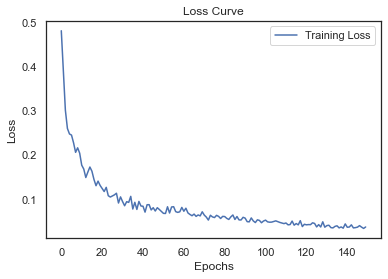

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = lstm_model.predict(x_train)

2/2 [==============================] - 3s 125ms/step


In [ ]:
y_train_2d = y_train.reshape(-1, 1)

In [ ]:
# Previsões para o conjunto de teste (ou conjunto de validação)
x_test, y_test = custom_ts_multi_data_prep(X_test_scaled, Y_test_scaled, hist_window, horizon)  # Substitua X_test_scaled e Y_test_scaled pelos dados de teste
y_pred = lstm_model.predict(x_test)
y_pred = scaler_Y.inverse_transform(y_pred)

NameError: name 'X_test_scaled' is not defined

In [ ]:
# Inverta a escala das previsões e dos dados reais
y_pred = scaler_Y.inverse_transform(y_pred)
y_real = scaler_Y.inverse_transform(y_train_2d)


In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

ValueError: Found input variables with inconsistent numbers of samples: [540, 54]